In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
import os
import collections
import itertools

In [3]:
import numpy as np
import scipy as sp
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

In [4]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

In [7]:
train = pd.read_csv("E:\\DataScience\\Inceptez\\CNN\\Train_UQcUa52\\train.csv")

In [8]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [50]:
test= pd.read_csv("E:\DataScience\Inceptez\CNN\Test_fCbTej3.csv")

In [10]:
test.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

my_img = cv2.imread('E:\\DataScience\\Inceptez\\CNN\\Train_UQcUa52\\Images\\train\\0.png') 


In [15]:
my_img.shape

(28, 28, 3)

In [16]:
inverted_img = (255.0 - my_img)  
final = inverted_img / 255.0

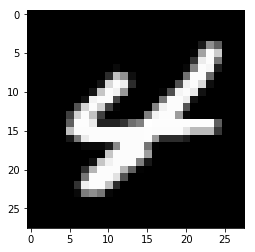

In [20]:
plt.imshow(my_img)
plt.show()

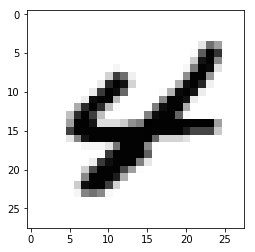

In [17]:
# Visualize the result
plt.imshow(final)
plt.show()

In [22]:
print(final.shape)


(28, 28, 3)


In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [24]:
from keras.layers import LSTM

In [30]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Images/train/'+train['filename'][i], target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|███████████████████████████████████████████████████████████████████████████| 49000/49000 [01:49<00:00, 446.82it/s]


In [34]:
y=train['label'].values
y

array([4, 9, 1, ..., 9, 3, 0], dtype=int64)

In [35]:
y = to_categorical(y)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [37]:

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(254, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [38]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [39]:
model.fit(X_train, y_train, verbose=1,batch_size=254, epochs=100, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 39200 samples, validate on 9800 samples
Epoch 1/100
39200/39200 [==============================] - ETA: 18:53 - loss: 2.3032 - acc: 0.09 - ETA: 11:22 - loss: 2.2168 - acc: 0.23 - ETA: 8:45 - loss: 2.1048 - acc: 0.3228 - ETA: 7:24 - loss: 1.9519 - acc: 0.403 - ETA: 6:36 - loss: 1.7885 - acc: 0.457 - ETA: 6:01 - loss: 1.6492 - acc: 0.494 - ETA: 5:41 - loss: 1.5281 - acc: 0.527 - ETA: 5:21 - loss: 1.4501 - acc: 0.552 - ETA: 5:06 - loss: 1.3831 - acc: 0.571 - ETA: 4:54 - loss: 1.3062 - acc: 0.594 - ETA: 4:42 - loss: 1.2497 - acc: 0.609 - ETA: 4:34 - loss: 1.2100 - acc: 0.623 - ETA: 4:28 - loss: 1.1605 - acc: 0.637 - ETA: 4:22 - loss: 1.1226 - acc: 0.650 - ETA: 4:17 - loss: 1.0910 - acc: 0.660 - ETA: 4:11 - loss: 1.0633 - acc: 0.669 - ETA: 4:06 - loss: 1.0292 - acc: 0.679 - ETA: 4:02 - loss: 1.0069 - acc: 0.687 - ETA: 3:58 - loss: 0.9790 - acc: 0.696 - ETA: 3:55 - loss: 0.9497 - acc: 0.707 - ETA: 3:51 - loss: 0.9288 - acc: 0.714 - ETA

39200/39200 [==============================] - ETA: 3:48 - loss: 0.0991 - acc: 0.960 - ETA: 3:38 - loss: 0.1088 - acc: 0.968 - ETA: 3:39 - loss: 0.0977 - acc: 0.973 - ETA: 3:36 - loss: 0.0936 - acc: 0.972 - ETA: 3:35 - loss: 0.0856 - acc: 0.974 - ETA: 3:32 - loss: 0.0844 - acc: 0.973 - ETA: 3:31 - loss: 0.0846 - acc: 0.973 - ETA: 3:29 - loss: 0.0925 - acc: 0.969 - ETA: 3:28 - loss: 0.0896 - acc: 0.971 - ETA: 3:25 - loss: 0.0872 - acc: 0.970 - ETA: 3:23 - loss: 0.0884 - acc: 0.970 - ETA: 3:24 - loss: 0.0868 - acc: 0.970 - ETA: 3:22 - loss: 0.0847 - acc: 0.970 - ETA: 3:21 - loss: 0.0844 - acc: 0.970 - ETA: 3:20 - loss: 0.0831 - acc: 0.971 - ETA: 3:19 - loss: 0.0853 - acc: 0.970 - ETA: 3:17 - loss: 0.0857 - acc: 0.970 - ETA: 3:16 - loss: 0.0860 - acc: 0.970 - ETA: 3:15 - loss: 0.0874 - acc: 0.970 - ETA: 3:13 - loss: 0.0873 - acc: 0.969 - ETA: 3:12 - loss: 0.0886 - acc: 0.969 - ETA: 3:11 - loss: 0.0885 - acc: 0.969 - ETA: 3:10 - loss: 0.0872 - acc: 0.970 - ETA: 3:10 - loss: 0.0878 - acc: 0

39200/39200 [==============================] - ETA: 5:04 - loss: 0.0355 - acc: 0.988 - ETA: 5:15 - loss: 0.0446 - acc: 0.986 - ETA: 5:32 - loss: 0.0614 - acc: 0.980 - ETA: 5:07 - loss: 0.0610 - acc: 0.980 - ETA: 5:14 - loss: 0.0575 - acc: 0.981 - ETA: 5:06 - loss: 0.0556 - acc: 0.982 - ETA: 4:59 - loss: 0.0557 - acc: 0.982 - ETA: 4:49 - loss: 0.0525 - acc: 0.983 - ETA: 4:40 - loss: 0.0486 - acc: 0.985 - ETA: 4:34 - loss: 0.0503 - acc: 0.984 - ETA: 4:29 - loss: 0.0510 - acc: 0.984 - ETA: 4:24 - loss: 0.0525 - acc: 0.984 - ETA: 4:18 - loss: 0.0517 - acc: 0.984 - ETA: 4:12 - loss: 0.0517 - acc: 0.984 - ETA: 4:06 - loss: 0.0517 - acc: 0.984 - ETA: 4:01 - loss: 0.0502 - acc: 0.985 - ETA: 3:57 - loss: 0.0501 - acc: 0.984 - ETA: 3:52 - loss: 0.0517 - acc: 0.983 - ETA: 3:49 - loss: 0.0524 - acc: 0.983 - ETA: 3:45 - loss: 0.0532 - acc: 0.983 - ETA: 3:44 - loss: 0.0539 - acc: 0.983 - ETA: 3:43 - loss: 0.0533 - acc: 0.983 - ETA: 3:45 - loss: 0.0532 - acc: 0.983 - ETA: 3:47 - loss: 0.0530 - acc: 0

39200/39200 [==============================] - ETA: 4:21 - loss: 0.0321 - acc: 0.988 - ETA: 4:19 - loss: 0.0292 - acc: 0.992 - ETA: 4:03 - loss: 0.0378 - acc: 0.986 - ETA: 3:56 - loss: 0.0496 - acc: 0.983 - ETA: 3:50 - loss: 0.0448 - acc: 0.985 - ETA: 3:44 - loss: 0.0414 - acc: 0.986 - ETA: 3:44 - loss: 0.0388 - acc: 0.987 - ETA: 3:43 - loss: 0.0387 - acc: 0.987 - ETA: 3:47 - loss: 0.0370 - acc: 0.987 - ETA: 3:45 - loss: 0.0358 - acc: 0.988 - ETA: 3:44 - loss: 0.0360 - acc: 0.988 - ETA: 3:41 - loss: 0.0350 - acc: 0.988 - ETA: 3:39 - loss: 0.0342 - acc: 0.988 - ETA: 3:38 - loss: 0.0357 - acc: 0.988 - ETA: 3:38 - loss: 0.0397 - acc: 0.988 - ETA: 3:36 - loss: 0.0390 - acc: 0.988 - ETA: 3:33 - loss: 0.0394 - acc: 0.988 - ETA: 3:31 - loss: 0.0393 - acc: 0.988 - ETA: 3:28 - loss: 0.0401 - acc: 0.988 - ETA: 3:27 - loss: 0.0399 - acc: 0.988 - ETA: 3:25 - loss: 0.0435 - acc: 0.988 - ETA: 3:23 - loss: 0.0427 - acc: 0.988 - ETA: 3:20 - loss: 0.0427 - acc: 0.988 - ETA: 3:18 - loss: 0.0427 - acc: 0

39200/39200 [==============================] - ETA: 3:48 - loss: 0.0257 - acc: 0.992 - ETA: 3:43 - loss: 0.0296 - acc: 0.992 - ETA: 3:42 - loss: 0.0255 - acc: 0.993 - ETA: 3:35 - loss: 0.0250 - acc: 0.992 - ETA: 3:32 - loss: 0.0250 - acc: 0.992 - ETA: 3:31 - loss: 0.0306 - acc: 0.989 - ETA: 3:28 - loss: 0.0313 - acc: 0.989 - ETA: 3:27 - loss: 0.0329 - acc: 0.989 - ETA: 3:24 - loss: 0.0341 - acc: 0.988 - ETA: 3:23 - loss: 0.0318 - acc: 0.989 - ETA: 3:22 - loss: 0.0306 - acc: 0.990 - ETA: 3:20 - loss: 0.0296 - acc: 0.990 - ETA: 3:18 - loss: 0.0313 - acc: 0.990 - ETA: 3:17 - loss: 0.0306 - acc: 0.989 - ETA: 3:16 - loss: 0.0295 - acc: 0.990 - ETA: 3:14 - loss: 0.0290 - acc: 0.990 - ETA: 3:13 - loss: 0.0286 - acc: 0.990 - ETA: 3:11 - loss: 0.0299 - acc: 0.989 - ETA: 3:10 - loss: 0.0300 - acc: 0.990 - ETA: 3:09 - loss: 0.0317 - acc: 0.989 - ETA: 3:08 - loss: 0.0314 - acc: 0.989 - ETA: 3:07 - loss: 0.0305 - acc: 0.990 - ETA: 3:09 - loss: 0.0310 - acc: 0.989 - ETA: 3:16 - loss: 0.0312 - acc: 0

39200/39200 [==============================] - ETA: 4:06 - loss: 0.0188 - acc: 0.988 - ETA: 6:23 - loss: 0.0302 - acc: 0.982 - ETA: 5:27 - loss: 0.0255 - acc: 0.986 - ETA: 4:55 - loss: 0.0302 - acc: 0.987 - ETA: 4:37 - loss: 0.0283 - acc: 0.989 - ETA: 4:24 - loss: 0.0294 - acc: 0.989 - ETA: 4:14 - loss: 0.0272 - acc: 0.990 - ETA: 4:06 - loss: 0.0270 - acc: 0.989 - ETA: 3:59 - loss: 0.0272 - acc: 0.989 - ETA: 3:55 - loss: 0.0263 - acc: 0.990 - ETA: 3:50 - loss: 0.0260 - acc: 0.990 - ETA: 3:45 - loss: 0.0250 - acc: 0.991 - ETA: 3:42 - loss: 0.0260 - acc: 0.991 - ETA: 3:38 - loss: 0.0258 - acc: 0.991 - ETA: 3:37 - loss: 0.0250 - acc: 0.991 - ETA: 3:33 - loss: 0.0243 - acc: 0.991 - ETA: 3:32 - loss: 0.0234 - acc: 0.992 - ETA: 3:30 - loss: 0.0229 - acc: 0.992 - ETA: 3:28 - loss: 0.0232 - acc: 0.992 - ETA: 3:27 - loss: 0.0248 - acc: 0.992 - ETA: 3:25 - loss: 0.0247 - acc: 0.992 - ETA: 3:23 - loss: 0.0254 - acc: 0.991 - ETA: 3:20 - loss: 0.0255 - acc: 0.991 - ETA: 3:18 - loss: 0.0255 - acc: 0

39200/39200 [==============================] - ETA: 4:01 - loss: 0.0084 - acc: 1.000 - ETA: 3:57 - loss: 0.0095 - acc: 1.000 - ETA: 3:54 - loss: 0.0093 - acc: 0.998 - ETA: 3:53 - loss: 0.0144 - acc: 0.996 - ETA: 3:49 - loss: 0.0191 - acc: 0.995 - ETA: 3:47 - loss: 0.0179 - acc: 0.995 - ETA: 3:46 - loss: 0.0172 - acc: 0.995 - ETA: 3:44 - loss: 0.0224 - acc: 0.994 - ETA: 3:42 - loss: 0.0232 - acc: 0.993 - ETA: 3:40 - loss: 0.0253 - acc: 0.993 - ETA: 3:41 - loss: 0.0235 - acc: 0.994 - ETA: 3:39 - loss: 0.0223 - acc: 0.994 - ETA: 3:38 - loss: 0.0239 - acc: 0.994 - ETA: 3:36 - loss: 0.0276 - acc: 0.994 - ETA: 3:34 - loss: 0.0273 - acc: 0.994 - ETA: 3:33 - loss: 0.0282 - acc: 0.993 - ETA: 3:31 - loss: 0.0277 - acc: 0.993 - ETA: 3:29 - loss: 0.0285 - acc: 0.993 - ETA: 3:28 - loss: 0.0274 - acc: 0.993 - ETA: 3:27 - loss: 0.0268 - acc: 0.993 - ETA: 3:26 - loss: 0.0261 - acc: 0.993 - ETA: 3:25 - loss: 0.0256 - acc: 0.993 - ETA: 3:24 - loss: 0.0254 - acc: 0.993 - ETA: 3:23 - loss: 0.0252 - acc: 0

39200/39200 [==============================] - ETA: 4:05 - loss: 0.0420 - acc: 0.988 - ETA: 3:59 - loss: 0.0302 - acc: 0.990 - ETA: 3:55 - loss: 0.0234 - acc: 0.992 - ETA: 3:54 - loss: 0.0227 - acc: 0.992 - ETA: 3:50 - loss: 0.0203 - acc: 0.992 - ETA: 3:49 - loss: 0.0214 - acc: 0.993 - ETA: 3:47 - loss: 0.0226 - acc: 0.992 - ETA: 3:47 - loss: 0.0223 - acc: 0.993 - ETA: 3:45 - loss: 0.0255 - acc: 0.991 - ETA: 3:44 - loss: 0.0238 - acc: 0.992 - ETA: 3:42 - loss: 0.0223 - acc: 0.993 - ETA: 3:43 - loss: 0.0219 - acc: 0.993 - ETA: 3:41 - loss: 0.0213 - acc: 0.993 - ETA: 3:40 - loss: 0.0212 - acc: 0.993 - ETA: 3:39 - loss: 0.0204 - acc: 0.993 - ETA: 3:37 - loss: 0.0202 - acc: 0.993 - ETA: 3:35 - loss: 0.0197 - acc: 0.993 - ETA: 3:34 - loss: 0.0192 - acc: 0.993 - ETA: 3:33 - loss: 0.0191 - acc: 0.993 - ETA: 3:32 - loss: 0.0184 - acc: 0.993 - ETA: 3:31 - loss: 0.0184 - acc: 0.994 - ETA: 3:29 - loss: 0.0180 - acc: 0.994 - ETA: 3:27 - loss: 0.0173 - acc: 0.994 - ETA: 3:25 - loss: 0.0198 - acc: 0

39200/39200 [==============================] - ETA: 3:36 - loss: 0.0129 - acc: 0.996 - ETA: 3:30 - loss: 0.0164 - acc: 0.994 - ETA: 3:29 - loss: 0.0180 - acc: 0.992 - ETA: 3:25 - loss: 0.0222 - acc: 0.991 - ETA: 3:27 - loss: 0.0184 - acc: 0.992 - ETA: 3:25 - loss: 0.0164 - acc: 0.994 - ETA: 3:25 - loss: 0.0179 - acc: 0.993 - ETA: 3:24 - loss: 0.0181 - acc: 0.993 - ETA: 3:22 - loss: 0.0169 - acc: 0.993 - ETA: 3:22 - loss: 0.0166 - acc: 0.993 - ETA: 3:22 - loss: 0.0165 - acc: 0.992 - ETA: 3:21 - loss: 0.0155 - acc: 0.993 - ETA: 3:21 - loss: 0.0151 - acc: 0.993 - ETA: 3:20 - loss: 0.0150 - acc: 0.993 - ETA: 3:18 - loss: 0.0145 - acc: 0.993 - ETA: 3:16 - loss: 0.0146 - acc: 0.993 - ETA: 3:14 - loss: 0.0156 - acc: 0.993 - ETA: 3:13 - loss: 0.0150 - acc: 0.993 - ETA: 3:11 - loss: 0.0150 - acc: 0.994 - ETA: 3:10 - loss: 0.0154 - acc: 0.993 - ETA: 3:08 - loss: 0.0165 - acc: 0.993 - ETA: 3:06 - loss: 0.0173 - acc: 0.993 - ETA: 3:04 - loss: 0.0175 - acc: 0.993 - ETA: 3:03 - loss: 0.0176 - acc: 0

39200/39200 [==============================] - ETA: 3:38 - loss: 0.0123 - acc: 0.996 - ETA: 3:32 - loss: 0.0119 - acc: 0.996 - ETA: 3:28 - loss: 0.0113 - acc: 0.996 - ETA: 3:25 - loss: 0.0153 - acc: 0.995 - ETA: 3:24 - loss: 0.0158 - acc: 0.994 - ETA: 3:22 - loss: 0.0140 - acc: 0.995 - ETA: 3:22 - loss: 0.0134 - acc: 0.995 - ETA: 3:23 - loss: 0.0125 - acc: 0.996 - ETA: 3:23 - loss: 0.0116 - acc: 0.996 - ETA: 3:21 - loss: 0.0122 - acc: 0.996 - ETA: 3:20 - loss: 0.0128 - acc: 0.995 - ETA: 3:17 - loss: 0.0122 - acc: 0.996 - ETA: 3:17 - loss: 0.0119 - acc: 0.996 - ETA: 3:16 - loss: 0.0141 - acc: 0.995 - ETA: 3:14 - loss: 0.0146 - acc: 0.995 - ETA: 3:12 - loss: 0.0143 - acc: 0.995 - ETA: 3:11 - loss: 0.0145 - acc: 0.994 - ETA: 3:09 - loss: 0.0141 - acc: 0.995 - ETA: 3:07 - loss: 0.0147 - acc: 0.994 - ETA: 3:06 - loss: 0.0146 - acc: 0.994 - ETA: 3:04 - loss: 0.0145 - acc: 0.994 - ETA: 3:03 - loss: 0.0148 - acc: 0.994 - ETA: 3:01 - loss: 0.0170 - acc: 0.993 - ETA: 3:00 - loss: 0.0165 - acc: 0

39200/39200 [==============================] - ETA: 4:15 - loss: 0.0050 - acc: 1.000 - ETA: 4:03 - loss: 0.0115 - acc: 0.998 - ETA: 3:59 - loss: 0.0134 - acc: 0.997 - ETA: 3:54 - loss: 0.0162 - acc: 0.996 - ETA: 3:48 - loss: 0.0168 - acc: 0.994 - ETA: 3:43 - loss: 0.0188 - acc: 0.992 - ETA: 3:39 - loss: 0.0181 - acc: 0.992 - ETA: 3:37 - loss: 0.0162 - acc: 0.993 - ETA: 3:34 - loss: 0.0164 - acc: 0.993 - ETA: 3:33 - loss: 0.0151 - acc: 0.994 - ETA: 3:31 - loss: 0.0141 - acc: 0.994 - ETA: 3:28 - loss: 0.0154 - acc: 0.993 - ETA: 3:26 - loss: 0.0147 - acc: 0.994 - ETA: 3:24 - loss: 0.0144 - acc: 0.994 - ETA: 3:24 - loss: 0.0152 - acc: 0.994 - ETA: 3:22 - loss: 0.0192 - acc: 0.994 - ETA: 3:20 - loss: 0.0191 - acc: 0.993 - ETA: 3:19 - loss: 0.0182 - acc: 0.994 - ETA: 3:17 - loss: 0.0176 - acc: 0.994 - ETA: 3:15 - loss: 0.0185 - acc: 0.994 - ETA: 3:13 - loss: 0.0183 - acc: 0.994 - ETA: 3:12 - loss: 0.0176 - acc: 0.994 - ETA: 3:10 - loss: 0.0169 - acc: 0.994 - ETA: 3:09 - loss: 0.0172 - acc: 0

39200/39200 [==============================] - ETA: 3:41 - loss: 0.0133 - acc: 0.992 - ETA: 3:33 - loss: 0.0127 - acc: 0.992 - ETA: 3:29 - loss: 0.0137 - acc: 0.993 - ETA: 3:29 - loss: 0.0115 - acc: 0.995 - ETA: 3:26 - loss: 0.0110 - acc: 0.995 - ETA: 3:24 - loss: 0.0150 - acc: 0.994 - ETA: 3:22 - loss: 0.0133 - acc: 0.995 - ETA: 3:22 - loss: 0.0124 - acc: 0.996 - ETA: 3:22 - loss: 0.0181 - acc: 0.996 - ETA: 3:22 - loss: 0.0170 - acc: 0.996 - ETA: 3:20 - loss: 0.0164 - acc: 0.995 - ETA: 3:19 - loss: 0.0159 - acc: 0.995 - ETA: 3:16 - loss: 0.0151 - acc: 0.995 - ETA: 3:15 - loss: 0.0146 - acc: 0.995 - ETA: 3:13 - loss: 0.0140 - acc: 0.995 - ETA: 3:12 - loss: 0.0146 - acc: 0.995 - ETA: 3:10 - loss: 0.0178 - acc: 0.994 - ETA: 3:09 - loss: 0.0178 - acc: 0.994 - ETA: 3:07 - loss: 0.0170 - acc: 0.994 - ETA: 3:06 - loss: 0.0166 - acc: 0.994 - ETA: 3:05 - loss: 0.0170 - acc: 0.994 - ETA: 3:04 - loss: 0.0167 - acc: 0.994 - ETA: 3:02 - loss: 0.0168 - acc: 0.994 - ETA: 3:01 - loss: 0.0171 - acc: 0

39200/39200 [==============================] - ETA: 3:42 - loss: 0.0036 - acc: 1.000 - ETA: 3:34 - loss: 0.0036 - acc: 1.000 - ETA: 3:35 - loss: 0.0040 - acc: 1.000 - ETA: 3:36 - loss: 0.0069 - acc: 0.998 - ETA: 3:36 - loss: 0.0060 - acc: 0.998 - ETA: 3:36 - loss: 0.0066 - acc: 0.998 - ETA: 3:34 - loss: 0.0078 - acc: 0.997 - ETA: 3:33 - loss: 0.0077 - acc: 0.997 - ETA: 3:33 - loss: 0.0082 - acc: 0.997 - ETA: 3:29 - loss: 0.0104 - acc: 0.996 - ETA: 3:26 - loss: 0.0112 - acc: 0.996 - ETA: 3:26 - loss: 0.0122 - acc: 0.996 - ETA: 3:24 - loss: 0.0119 - acc: 0.996 - ETA: 3:22 - loss: 0.0124 - acc: 0.995 - ETA: 3:20 - loss: 0.0122 - acc: 0.995 - ETA: 3:18 - loss: 0.0117 - acc: 0.995 - ETA: 3:16 - loss: 0.0116 - acc: 0.995 - ETA: 3:14 - loss: 0.0122 - acc: 0.995 - ETA: 3:12 - loss: 0.0120 - acc: 0.995 - ETA: 3:11 - loss: 0.0118 - acc: 0.995 - ETA: 3:09 - loss: 0.0117 - acc: 0.995 - ETA: 3:08 - loss: 0.0118 - acc: 0.995 - ETA: 3:06 - loss: 0.0114 - acc: 0.995 - ETA: 3:04 - loss: 0.0111 - acc: 0

39200/39200 [==============================] - ETA: 3:43 - loss: 0.0381 - acc: 0.988 - ETA: 3:35 - loss: 0.0240 - acc: 0.992 - ETA: 3:40 - loss: 0.0183 - acc: 0.994 - ETA: 3:34 - loss: 0.0164 - acc: 0.995 - ETA: 3:31 - loss: 0.0160 - acc: 0.995 - ETA: 3:29 - loss: 0.0139 - acc: 0.996 - ETA: 3:26 - loss: 0.0161 - acc: 0.996 - ETA: 3:26 - loss: 0.0146 - acc: 0.996 - ETA: 3:25 - loss: 0.0137 - acc: 0.996 - ETA: 3:23 - loss: 0.0124 - acc: 0.996 - ETA: 3:21 - loss: 0.0117 - acc: 0.997 - ETA: 3:19 - loss: 0.0136 - acc: 0.996 - ETA: 3:18 - loss: 0.0148 - acc: 0.996 - ETA: 3:17 - loss: 0.0139 - acc: 0.996 - ETA: 3:15 - loss: 0.0130 - acc: 0.996 - ETA: 3:14 - loss: 0.0124 - acc: 0.997 - ETA: 3:14 - loss: 0.0126 - acc: 0.996 - ETA: 3:13 - loss: 0.0132 - acc: 0.996 - ETA: 3:11 - loss: 0.0126 - acc: 0.996 - ETA: 3:10 - loss: 0.0140 - acc: 0.996 - ETA: 3:08 - loss: 0.0139 - acc: 0.996 - ETA: 3:06 - loss: 0.0136 - acc: 0.996 - ETA: 3:05 - loss: 0.0132 - acc: 0.996 - ETA: 3:04 - loss: 0.0127 - acc: 0

39200/39200 [==============================] - ETA: 3:47 - loss: 0.0039 - acc: 1.000 - ETA: 3:39 - loss: 0.0035 - acc: 1.000 - ETA: 3:36 - loss: 0.0048 - acc: 0.998 - ETA: 3:34 - loss: 0.0041 - acc: 0.999 - ETA: 3:31 - loss: 0.0043 - acc: 0.999 - ETA: 3:30 - loss: 0.0077 - acc: 0.998 - ETA: 3:27 - loss: 0.0068 - acc: 0.998 - ETA: 3:25 - loss: 0.0064 - acc: 0.998 - ETA: 3:25 - loss: 0.0059 - acc: 0.998 - ETA: 3:23 - loss: 0.0056 - acc: 0.998 - ETA: 3:21 - loss: 0.0053 - acc: 0.998 - ETA: 3:19 - loss: 0.0057 - acc: 0.998 - ETA: 3:18 - loss: 0.0064 - acc: 0.998 - ETA: 3:16 - loss: 0.0060 - acc: 0.998 - ETA: 3:15 - loss: 0.0057 - acc: 0.998 - ETA: 3:13 - loss: 0.0057 - acc: 0.998 - ETA: 3:11 - loss: 0.0056 - acc: 0.998 - ETA: 3:09 - loss: 0.0055 - acc: 0.998 - ETA: 3:09 - loss: 0.0064 - acc: 0.998 - ETA: 3:07 - loss: 0.0068 - acc: 0.998 - ETA: 3:06 - loss: 0.0076 - acc: 0.997 - ETA: 3:05 - loss: 0.0077 - acc: 0.997 - ETA: 3:03 - loss: 0.0077 - acc: 0.997 - ETA: 3:02 - loss: 0.0074 - acc: 0

39200/39200 [==============================] - ETA: 3:39 - loss: 0.0063 - acc: 1.000 - ETA: 3:51 - loss: 0.0074 - acc: 0.998 - ETA: 3:46 - loss: 0.0138 - acc: 0.997 - ETA: 3:46 - loss: 0.0116 - acc: 0.998 - ETA: 3:42 - loss: 0.0140 - acc: 0.996 - ETA: 3:38 - loss: 0.0125 - acc: 0.997 - ETA: 3:36 - loss: 0.0165 - acc: 0.996 - ETA: 3:33 - loss: 0.0173 - acc: 0.996 - ETA: 3:29 - loss: 0.0178 - acc: 0.995 - ETA: 3:28 - loss: 0.0169 - acc: 0.995 - ETA: 3:25 - loss: 0.0167 - acc: 0.995 - ETA: 3:23 - loss: 0.0155 - acc: 0.996 - ETA: 3:22 - loss: 0.0144 - acc: 0.996 - ETA: 3:20 - loss: 0.0135 - acc: 0.996 - ETA: 3:19 - loss: 0.0131 - acc: 0.996 - ETA: 3:17 - loss: 0.0134 - acc: 0.996 - ETA: 3:16 - loss: 0.0134 - acc: 0.996 - ETA: 3:14 - loss: 0.0130 - acc: 0.996 - ETA: 3:13 - loss: 0.0126 - acc: 0.996 - ETA: 3:11 - loss: 0.0121 - acc: 0.996 - ETA: 3:10 - loss: 0.0118 - acc: 0.996 - ETA: 3:10 - loss: 0.0115 - acc: 0.996 - ETA: 3:08 - loss: 0.0115 - acc: 0.996 - ETA: 3:06 - loss: 0.0121 - acc: 0

39200/39200 [==============================] - ETA: 3:32 - loss: 0.0032 - acc: 1.000 - ETA: 3:38 - loss: 0.0067 - acc: 0.998 - ETA: 3:37 - loss: 0.0051 - acc: 0.998 - ETA: 3:38 - loss: 0.0090 - acc: 0.998 - ETA: 3:37 - loss: 0.0079 - acc: 0.998 - ETA: 3:34 - loss: 0.0070 - acc: 0.998 - ETA: 3:33 - loss: 0.0082 - acc: 0.998 - ETA: 3:31 - loss: 0.0084 - acc: 0.998 - ETA: 3:29 - loss: 0.0081 - acc: 0.997 - ETA: 3:27 - loss: 0.0081 - acc: 0.997 - ETA: 3:26 - loss: 0.0077 - acc: 0.997 - ETA: 3:25 - loss: 0.0077 - acc: 0.997 - ETA: 3:24 - loss: 0.0073 - acc: 0.997 - ETA: 3:22 - loss: 0.0069 - acc: 0.998 - ETA: 3:20 - loss: 0.0068 - acc: 0.997 - ETA: 3:18 - loss: 0.0084 - acc: 0.997 - ETA: 3:17 - loss: 0.0080 - acc: 0.997 - ETA: 3:16 - loss: 0.0082 - acc: 0.997 - ETA: 3:14 - loss: 0.0079 - acc: 0.997 - ETA: 3:13 - loss: 0.0078 - acc: 0.997 - ETA: 3:12 - loss: 0.0078 - acc: 0.997 - ETA: 3:10 - loss: 0.0082 - acc: 0.997 - ETA: 3:08 - loss: 0.0087 - acc: 0.997 - ETA: 3:06 - loss: 0.0094 - acc: 0

39200/39200 [==============================] - ETA: 3:31 - loss: 0.0012 - acc: 1.000 - ETA: 3:24 - loss: 0.0032 - acc: 0.998 - ETA: 3:31 - loss: 0.0074 - acc: 0.997 - ETA: 3:28 - loss: 0.0065 - acc: 0.998 - ETA: 3:24 - loss: 0.0089 - acc: 0.997 - ETA: 3:22 - loss: 0.0084 - acc: 0.997 - ETA: 3:22 - loss: 0.0088 - acc: 0.997 - ETA: 3:20 - loss: 0.0079 - acc: 0.997 - ETA: 3:18 - loss: 0.0072 - acc: 0.997 - ETA: 3:17 - loss: 0.0070 - acc: 0.997 - ETA: 3:16 - loss: 0.0066 - acc: 0.997 - ETA: 3:14 - loss: 0.0064 - acc: 0.998 - ETA: 3:14 - loss: 0.0070 - acc: 0.997 - ETA: 3:13 - loss: 0.0074 - acc: 0.997 - ETA: 3:11 - loss: 0.0074 - acc: 0.997 - ETA: 3:11 - loss: 0.0077 - acc: 0.996 - ETA: 3:09 - loss: 0.0073 - acc: 0.997 - ETA: 3:08 - loss: 0.0071 - acc: 0.997 - ETA: 3:07 - loss: 0.0069 - acc: 0.997 - ETA: 3:06 - loss: 0.0069 - acc: 0.997 - ETA: 3:05 - loss: 0.0077 - acc: 0.997 - ETA: 3:04 - loss: 0.0074 - acc: 0.997 - ETA: 3:02 - loss: 0.0072 - acc: 0.997 - ETA: 3:01 - loss: 0.0070 - acc: 0

39200/39200 [==============================] - ETA: 3:33 - loss: 0.0035 - acc: 1.000 - ETA: 3:42 - loss: 0.0105 - acc: 0.994 - ETA: 3:43 - loss: 0.0091 - acc: 0.994 - ETA: 3:41 - loss: 0.0075 - acc: 0.996 - ETA: 3:40 - loss: 0.0065 - acc: 0.996 - ETA: 3:36 - loss: 0.0068 - acc: 0.996 - ETA: 3:33 - loss: 0.0061 - acc: 0.997 - ETA: 3:32 - loss: 0.0059 - acc: 0.997 - ETA: 3:29 - loss: 0.0057 - acc: 0.997 - ETA: 3:26 - loss: 0.0075 - acc: 0.996 - ETA: 3:24 - loss: 0.0073 - acc: 0.997 - ETA: 3:22 - loss: 0.0068 - acc: 0.997 - ETA: 3:19 - loss: 0.0064 - acc: 0.997 - ETA: 3:18 - loss: 0.0061 - acc: 0.997 - ETA: 3:16 - loss: 0.0061 - acc: 0.997 - ETA: 3:15 - loss: 0.0062 - acc: 0.997 - ETA: 3:13 - loss: 0.0061 - acc: 0.997 - ETA: 3:12 - loss: 0.0058 - acc: 0.997 - ETA: 3:09 - loss: 0.0058 - acc: 0.997 - ETA: 3:08 - loss: 0.0058 - acc: 0.997 - ETA: 3:08 - loss: 0.0059 - acc: 0.997 - ETA: 3:06 - loss: 0.0059 - acc: 0.997 - ETA: 3:05 - loss: 0.0060 - acc: 0.997 - ETA: 3:03 - loss: 0.0062 - acc: 0

39200/39200 [==============================] - ETA: 3:37 - loss: 0.0149 - acc: 0.996 - ETA: 3:31 - loss: 0.0089 - acc: 0.998 - ETA: 3:28 - loss: 0.0067 - acc: 0.998 - ETA: 3:27 - loss: 0.0080 - acc: 0.998 - ETA: 3:25 - loss: 0.0070 - acc: 0.998 - ETA: 3:24 - loss: 0.0059 - acc: 0.998 - ETA: 3:23 - loss: 0.0053 - acc: 0.998 - ETA: 3:21 - loss: 0.0054 - acc: 0.998 - ETA: 3:20 - loss: 0.0054 - acc: 0.998 - ETA: 3:19 - loss: 0.0051 - acc: 0.998 - ETA: 3:17 - loss: 0.0057 - acc: 0.998 - ETA: 3:16 - loss: 0.0065 - acc: 0.998 - ETA: 3:14 - loss: 0.0063 - acc: 0.998 - ETA: 3:13 - loss: 0.0069 - acc: 0.998 - ETA: 3:11 - loss: 0.0068 - acc: 0.997 - ETA: 3:10 - loss: 0.0068 - acc: 0.997 - ETA: 3:09 - loss: 0.0069 - acc: 0.997 - ETA: 3:08 - loss: 0.0070 - acc: 0.997 - ETA: 3:07 - loss: 0.0073 - acc: 0.997 - ETA: 3:07 - loss: 0.0072 - acc: 0.997 - ETA: 3:06 - loss: 0.0072 - acc: 0.997 - ETA: 3:05 - loss: 0.0070 - acc: 0.997 - ETA: 3:03 - loss: 0.0069 - acc: 0.997 - ETA: 3:03 - loss: 0.0067 - acc: 0

39200/39200 [==============================] - ETA: 3:38 - loss: 0.0036 - acc: 1.000 - ETA: 3:38 - loss: 0.0374 - acc: 0.996 - ETA: 3:36 - loss: 0.0267 - acc: 0.997 - ETA: 3:36 - loss: 0.0207 - acc: 0.998 - ETA: 3:32 - loss: 0.0182 - acc: 0.997 - ETA: 3:31 - loss: 0.0159 - acc: 0.998 - ETA: 3:29 - loss: 0.0146 - acc: 0.997 - ETA: 3:28 - loss: 0.0132 - acc: 0.998 - ETA: 3:26 - loss: 0.0125 - acc: 0.998 - ETA: 3:23 - loss: 0.0134 - acc: 0.997 - ETA: 3:21 - loss: 0.0125 - acc: 0.997 - ETA: 3:19 - loss: 0.0116 - acc: 0.998 - ETA: 3:19 - loss: 0.0111 - acc: 0.997 - ETA: 3:18 - loss: 0.0104 - acc: 0.998 - ETA: 3:17 - loss: 0.0106 - acc: 0.997 - ETA: 3:15 - loss: 0.0101 - acc: 0.998 - ETA: 3:15 - loss: 0.0096 - acc: 0.998 - ETA: 3:13 - loss: 0.0091 - acc: 0.998 - ETA: 3:11 - loss: 0.0091 - acc: 0.998 - ETA: 3:10 - loss: 0.0092 - acc: 0.998 - ETA: 3:08 - loss: 0.0089 - acc: 0.998 - ETA: 3:06 - loss: 0.0093 - acc: 0.997 - ETA: 3:05 - loss: 0.0089 - acc: 0.997 - ETA: 3:04 - loss: 0.0088 - acc: 0

39200/39200 [==============================] - ETA: 3:54 - loss: 0.0011 - acc: 1.000 - ETA: 3:49 - loss: 0.0018 - acc: 1.000 - ETA: 3:43 - loss: 0.0018 - acc: 1.000 - ETA: 3:42 - loss: 0.0034 - acc: 0.999 - ETA: 3:41 - loss: 0.0030 - acc: 0.999 - ETA: 3:38 - loss: 0.0026 - acc: 0.999 - ETA: 3:33 - loss: 0.0030 - acc: 0.998 - ETA: 3:31 - loss: 0.0032 - acc: 0.998 - ETA: 3:28 - loss: 0.0030 - acc: 0.998 - ETA: 3:26 - loss: 0.0033 - acc: 0.998 - ETA: 3:23 - loss: 0.0030 - acc: 0.998 - ETA: 3:21 - loss: 0.0029 - acc: 0.998 - ETA: 3:19 - loss: 0.0030 - acc: 0.998 - ETA: 3:17 - loss: 0.0028 - acc: 0.998 - ETA: 3:16 - loss: 0.0038 - acc: 0.998 - ETA: 3:15 - loss: 0.0046 - acc: 0.997 - ETA: 3:14 - loss: 0.0044 - acc: 0.997 - ETA: 3:13 - loss: 0.0042 - acc: 0.998 - ETA: 3:11 - loss: 0.0074 - acc: 0.997 - ETA: 3:09 - loss: 0.0073 - acc: 0.997 - ETA: 3:08 - loss: 0.0077 - acc: 0.997 - ETA: 3:07 - loss: 0.0075 - acc: 0.997 - ETA: 3:05 - loss: 0.0077 - acc: 0.997 - ETA: 3:03 - loss: 0.0078 - acc: 0

39200/39200 [==============================] - ETA: 3:43 - loss: 0.0011 - acc: 1.000 - ETA: 3:34 - loss: 9.1569e-04 - acc: 1.000 - ETA: 3:31 - loss: 0.0048 - acc: 0.9987    - ETA: 3:33 - loss: 0.0036 - acc: 0.999 - ETA: 3:31 - loss: 0.0044 - acc: 0.998 - ETA: 3:28 - loss: 0.0038 - acc: 0.998 - ETA: 3:28 - loss: 0.0041 - acc: 0.998 - ETA: 3:28 - loss: 0.0047 - acc: 0.997 - ETA: 3:26 - loss: 0.0054 - acc: 0.997 - ETA: 3:24 - loss: 0.0076 - acc: 0.996 - ETA: 3:23 - loss: 0.0086 - acc: 0.995 - ETA: 3:21 - loss: 0.0088 - acc: 0.995 - ETA: 3:19 - loss: 0.0081 - acc: 0.996 - ETA: 3:19 - loss: 0.0081 - acc: 0.996 - ETA: 3:18 - loss: 0.0097 - acc: 0.996 - ETA: 3:17 - loss: 0.0100 - acc: 0.996 - ETA: 3:15 - loss: 0.0101 - acc: 0.995 - ETA: 3:15 - loss: 0.0096 - acc: 0.996 - ETA: 3:14 - loss: 0.0094 - acc: 0.996 - ETA: 3:12 - loss: 0.0091 - acc: 0.996 - ETA: 3:11 - loss: 0.0091 - acc: 0.996 - ETA: 3:09 - loss: 0.0111 - acc: 0.996 - ETA: 3:09 - loss: 0.0116 - acc: 0.995 - ETA: 3:07 - loss: 0.0117 

39200/39200 [==============================] - ETA: 3:38 - loss: 0.0086 - acc: 0.996 - ETA: 3:38 - loss: 0.0055 - acc: 0.998 - ETA: 3:34 - loss: 0.0038 - acc: 0.998 - ETA: 3:32 - loss: 0.0065 - acc: 0.997 - ETA: 3:31 - loss: 0.0074 - acc: 0.996 - ETA: 3:29 - loss: 0.0084 - acc: 0.996 - ETA: 3:27 - loss: 0.0088 - acc: 0.996 - ETA: 3:24 - loss: 0.0086 - acc: 0.996 - ETA: 3:28 - loss: 0.0077 - acc: 0.996 - ETA: 3:26 - loss: 0.0070 - acc: 0.997 - ETA: 3:24 - loss: 0.0065 - acc: 0.997 - ETA: 3:26 - loss: 0.0092 - acc: 0.997 - ETA: 3:24 - loss: 0.0089 - acc: 0.997 - ETA: 3:22 - loss: 0.0086 - acc: 0.996 - ETA: 3:20 - loss: 0.0088 - acc: 0.996 - ETA: 3:18 - loss: 0.0087 - acc: 0.996 - ETA: 3:16 - loss: 0.0085 - acc: 0.996 - ETA: 3:14 - loss: 0.0081 - acc: 0.996 - ETA: 3:13 - loss: 0.0084 - acc: 0.996 - ETA: 3:11 - loss: 0.0081 - acc: 0.997 - ETA: 3:10 - loss: 0.0077 - acc: 0.997 - ETA: 3:09 - loss: 0.0074 - acc: 0.997 - ETA: 3:07 - loss: 0.0073 - acc: 0.997 - ETA: 3:06 - loss: 0.0070 - acc: 0

39200/39200 [==============================] - ETA: 3:34 - loss: 0.0013 - acc: 1.000 - ETA: 3:40 - loss: 0.0020 - acc: 1.000 - ETA: 3:31 - loss: 0.0020 - acc: 1.000 - ETA: 3:28 - loss: 0.0016 - acc: 1.000 - ETA: 3:26 - loss: 0.0021 - acc: 0.999 - ETA: 3:24 - loss: 0.0022 - acc: 0.999 - ETA: 3:23 - loss: 0.0025 - acc: 0.999 - ETA: 3:22 - loss: 0.0022 - acc: 0.999 - ETA: 3:21 - loss: 0.0025 - acc: 0.999 - ETA: 3:23 - loss: 0.0026 - acc: 0.999 - ETA: 3:23 - loss: 0.0025 - acc: 0.999 - ETA: 3:21 - loss: 0.0034 - acc: 0.999 - ETA: 3:21 - loss: 0.0034 - acc: 0.999 - ETA: 3:20 - loss: 0.0033 - acc: 0.999 - ETA: 3:18 - loss: 0.0041 - acc: 0.999 - ETA: 3:16 - loss: 0.0040 - acc: 0.999 - ETA: 3:15 - loss: 0.0038 - acc: 0.999 - ETA: 3:13 - loss: 0.0038 - acc: 0.999 - ETA: 3:12 - loss: 0.0037 - acc: 0.999 - ETA: 3:10 - loss: 0.0037 - acc: 0.999 - ETA: 3:09 - loss: 0.0042 - acc: 0.999 - ETA: 3:07 - loss: 0.0044 - acc: 0.998 - ETA: 3:06 - loss: 0.0046 - acc: 0.998 - ETA: 3:05 - loss: 0.0045 - acc: 0

39200/39200 [==============================] - ETA: 3:44 - loss: 0.0023 - acc: 1.000 - ETA: 3:32 - loss: 0.0014 - acc: 1.000 - ETA: 3:31 - loss: 0.0010 - acc: 1.000 - ETA: 3:27 - loss: 0.0119 - acc: 0.998 - ETA: 3:26 - loss: 0.0097 - acc: 0.998 - ETA: 3:24 - loss: 0.0086 - acc: 0.998 - ETA: 3:25 - loss: 0.0080 - acc: 0.998 - ETA: 3:24 - loss: 0.0074 - acc: 0.998 - ETA: 3:25 - loss: 0.0087 - acc: 0.997 - ETA: 3:23 - loss: 0.0080 - acc: 0.998 - ETA: 3:22 - loss: 0.0084 - acc: 0.997 - ETA: 3:20 - loss: 0.0083 - acc: 0.997 - ETA: 3:18 - loss: 0.0078 - acc: 0.997 - ETA: 3:17 - loss: 0.0075 - acc: 0.998 - ETA: 3:16 - loss: 0.0072 - acc: 0.998 - ETA: 3:15 - loss: 0.0073 - acc: 0.998 - ETA: 3:13 - loss: 0.0069 - acc: 0.998 - ETA: 3:12 - loss: 0.0069 - acc: 0.998 - ETA: 3:10 - loss: 0.0066 - acc: 0.998 - ETA: 3:09 - loss: 0.0077 - acc: 0.997 - ETA: 3:08 - loss: 0.0076 - acc: 0.997 - ETA: 3:06 - loss: 0.0074 - acc: 0.997 - ETA: 3:04 - loss: 0.0071 - acc: 0.997 - ETA: 3:03 - loss: 0.0069 - acc: 0

39200/39200 [==============================] - ETA: 3:36 - loss: 0.0226 - acc: 0.992 - ETA: 3:31 - loss: 0.0131 - acc: 0.996 - ETA: 3:30 - loss: 0.0106 - acc: 0.997 - ETA: 3:29 - loss: 0.0084 - acc: 0.998 - ETA: 3:26 - loss: 0.0067 - acc: 0.998 - ETA: 3:24 - loss: 0.0057 - acc: 0.998 - ETA: 3:23 - loss: 0.0055 - acc: 0.998 - ETA: 3:23 - loss: 0.0049 - acc: 0.998 - ETA: 3:21 - loss: 0.0044 - acc: 0.998 - ETA: 3:19 - loss: 0.0045 - acc: 0.998 - ETA: 3:18 - loss: 0.0045 - acc: 0.998 - ETA: 3:17 - loss: 0.0041 - acc: 0.998 - ETA: 3:16 - loss: 0.0050 - acc: 0.998 - ETA: 3:15 - loss: 0.0080 - acc: 0.997 - ETA: 3:14 - loss: 0.0077 - acc: 0.997 - ETA: 3:12 - loss: 0.0073 - acc: 0.997 - ETA: 3:11 - loss: 0.0071 - acc: 0.997 - ETA: 3:09 - loss: 0.0069 - acc: 0.997 - ETA: 3:08 - loss: 0.0066 - acc: 0.997 - ETA: 3:06 - loss: 0.0063 - acc: 0.998 - ETA: 3:05 - loss: 0.0065 - acc: 0.997 - ETA: 3:04 - loss: 0.0064 - acc: 0.997 - ETA: 3:02 - loss: 0.0063 - acc: 0.997 - ETA: 3:01 - loss: 0.0060 - acc: 0

39200/39200 [==============================] - ETA: 4:06 - loss: 0.0065 - acc: 0.996 - ETA: 4:00 - loss: 0.0034 - acc: 0.998 - ETA: 3:59 - loss: 0.0025 - acc: 0.998 - ETA: 3:57 - loss: 0.0020 - acc: 0.999 - ETA: 3:58 - loss: 0.0018 - acc: 0.999 - ETA: 3:59 - loss: 0.0044 - acc: 0.998 - ETA: 3:57 - loss: 0.0039 - acc: 0.998 - ETA: 3:55 - loss: 0.0035 - acc: 0.999 - ETA: 3:54 - loss: 0.0037 - acc: 0.998 - ETA: 3:52 - loss: 0.0054 - acc: 0.998 - ETA: 3:50 - loss: 0.0050 - acc: 0.998 - ETA: 3:49 - loss: 0.0049 - acc: 0.998 - ETA: 3:47 - loss: 0.0047 - acc: 0.998 - ETA: 3:45 - loss: 0.0046 - acc: 0.998 - ETA: 3:44 - loss: 0.0043 - acc: 0.998 - ETA: 4:00 - loss: 0.0049 - acc: 0.998 - ETA: 3:59 - loss: 0.0051 - acc: 0.998 - ETA: 3:57 - loss: 0.0049 - acc: 0.998 - ETA: 3:54 - loss: 0.0047 - acc: 0.998 - ETA: 3:52 - loss: 0.0046 - acc: 0.998 - ETA: 3:50 - loss: 0.0049 - acc: 0.998 - ETA: 3:47 - loss: 0.0047 - acc: 0.998 - ETA: 3:45 - loss: 0.0046 - acc: 0.998 - ETA: 3:43 - loss: 0.0047 - acc: 0

39200/39200 [==============================] - ETA: 3:41 - loss: 0.0018 - acc: 1.000 - ETA: 3:34 - loss: 0.0074 - acc: 0.996 - ETA: 3:28 - loss: 0.0053 - acc: 0.997 - ETA: 3:28 - loss: 0.0041 - acc: 0.998 - ETA: 3:26 - loss: 0.0047 - acc: 0.997 - ETA: 4:10 - loss: 0.0040 - acc: 0.998 - ETA: 4:04 - loss: 0.0036 - acc: 0.998 - ETA: 3:58 - loss: 0.0039 - acc: 0.998 - ETA: 3:54 - loss: 0.0038 - acc: 0.998 - ETA: 3:49 - loss: 0.0040 - acc: 0.998 - ETA: 3:44 - loss: 0.0037 - acc: 0.998 - ETA: 3:40 - loss: 0.0034 - acc: 0.998 - ETA: 3:37 - loss: 0.0033 - acc: 0.998 - ETA: 3:34 - loss: 0.0031 - acc: 0.998 - ETA: 3:32 - loss: 0.0036 - acc: 0.998 - ETA: 3:29 - loss: 0.0036 - acc: 0.998 - ETA: 3:26 - loss: 0.0037 - acc: 0.998 - ETA: 3:25 - loss: 0.0038 - acc: 0.998 - ETA: 3:22 - loss: 0.0052 - acc: 0.997 - ETA: 3:20 - loss: 0.0050 - acc: 0.998 - ETA: 3:18 - loss: 0.0048 - acc: 0.998 - ETA: 3:16 - loss: 0.0047 - acc: 0.998 - ETA: 3:14 - loss: 0.0047 - acc: 0.998 - ETA: 3:12 - loss: 0.0046 - acc: 0

39200/39200 [==============================] - ETA: 3:34 - loss: 0.0070 - acc: 0.996 - ETA: 3:28 - loss: 0.0036 - acc: 0.998 - ETA: 3:33 - loss: 0.0033 - acc: 0.998 - ETA: 4:17 - loss: 0.0096 - acc: 0.995 - ETA: 4:24 - loss: 0.0119 - acc: 0.995 - ETA: 4:13 - loss: 0.0105 - acc: 0.995 - ETA: 4:05 - loss: 0.0112 - acc: 0.994 - ETA: 3:59 - loss: 0.0106 - acc: 0.995 - ETA: 3:55 - loss: 0.0094 - acc: 0.995 - ETA: 3:52 - loss: 0.0090 - acc: 0.995 - ETA: 3:48 - loss: 0.0083 - acc: 0.996 - ETA: 3:44 - loss: 0.0090 - acc: 0.996 - ETA: 3:41 - loss: 0.0085 - acc: 0.996 - ETA: 3:38 - loss: 0.0089 - acc: 0.996 - ETA: 3:35 - loss: 0.0109 - acc: 0.995 - ETA: 3:31 - loss: 0.0105 - acc: 0.996 - ETA: 3:29 - loss: 0.0107 - acc: 0.996 - ETA: 3:27 - loss: 0.0101 - acc: 0.996 - ETA: 3:25 - loss: 0.0098 - acc: 0.996 - ETA: 3:22 - loss: 0.0095 - acc: 0.996 - ETA: 3:20 - loss: 0.0095 - acc: 0.996 - ETA: 3:18 - loss: 0.0091 - acc: 0.996 - ETA: 3:16 - loss: 0.0098 - acc: 0.996 - ETA: 3:14 - loss: 0.0107 - acc: 0

39200/39200 [==============================] - ETA: 3:44 - loss: 0.0033 - acc: 1.000 - ETA: 4:22 - loss: 0.0026 - acc: 1.000 - ETA: 5:04 - loss: 0.0033 - acc: 0.998 - ETA: 4:40 - loss: 0.0027 - acc: 0.999 - ETA: 4:23 - loss: 0.0067 - acc: 0.996 - ETA: 4:12 - loss: 0.0106 - acc: 0.994 - ETA: 4:04 - loss: 0.0092 - acc: 0.994 - ETA: 3:58 - loss: 0.0093 - acc: 0.995 - ETA: 3:53 - loss: 0.0085 - acc: 0.995 - ETA: 3:49 - loss: 0.0083 - acc: 0.995 - ETA: 3:46 - loss: 0.0076 - acc: 0.996 - ETA: 3:41 - loss: 0.0075 - acc: 0.996 - ETA: 3:39 - loss: 0.0079 - acc: 0.996 - ETA: 3:36 - loss: 0.0074 - acc: 0.996 - ETA: 3:34 - loss: 0.0073 - acc: 0.996 - ETA: 3:31 - loss: 0.0069 - acc: 0.996 - ETA: 3:28 - loss: 0.0066 - acc: 0.996 - ETA: 3:26 - loss: 0.0065 - acc: 0.996 - ETA: 3:24 - loss: 0.0062 - acc: 0.996 - ETA: 3:22 - loss: 0.0060 - acc: 0.997 - ETA: 3:20 - loss: 0.0058 - acc: 0.997 - ETA: 3:19 - loss: 0.0056 - acc: 0.997 - ETA: 3:17 - loss: 0.0057 - acc: 0.997 - ETA: 3:15 - loss: 0.0055 - acc: 0

39200/39200 [==============================] - ETA: 4:20 - loss: 0.0011 - acc: 1.000 - ETA: 3:58 - loss: 0.0024 - acc: 0.998 - ETA: 3:46 - loss: 0.0016 - acc: 0.998 - ETA: 3:48 - loss: 0.0016 - acc: 0.999 - ETA: 3:43 - loss: 0.0014 - acc: 0.999 - ETA: 3:37 - loss: 0.0013 - acc: 0.999 - ETA: 3:33 - loss: 0.0013 - acc: 0.999 - ETA: 3:30 - loss: 0.0012 - acc: 0.999 - ETA: 3:27 - loss: 0.0014 - acc: 0.999 - ETA: 3:24 - loss: 0.0017 - acc: 0.999 - ETA: 3:22 - loss: 0.0017 - acc: 0.999 - ETA: 3:20 - loss: 0.0019 - acc: 0.999 - ETA: 3:19 - loss: 0.0018 - acc: 0.999 - ETA: 3:18 - loss: 0.0039 - acc: 0.999 - ETA: 3:16 - loss: 0.0043 - acc: 0.998 - ETA: 3:14 - loss: 0.0041 - acc: 0.998 - ETA: 3:13 - loss: 0.0048 - acc: 0.998 - ETA: 3:12 - loss: 0.0051 - acc: 0.998 - ETA: 3:11 - loss: 0.0052 - acc: 0.997 - ETA: 3:10 - loss: 0.0051 - acc: 0.998 - ETA: 3:08 - loss: 0.0049 - acc: 0.998 - ETA: 3:08 - loss: 0.0048 - acc: 0.998 - ETA: 3:06 - loss: 0.0047 - acc: 0.998 - ETA: 3:04 - loss: 0.0046 - acc: 0

39200/39200 [==============================] - ETA: 3:33 - loss: 0.0039 - acc: 1.000 - ETA: 3:28 - loss: 0.0023 - acc: 1.000 - ETA: 3:29 - loss: 0.0022 - acc: 1.000 - ETA: 3:28 - loss: 0.0031 - acc: 0.999 - ETA: 3:30 - loss: 0.0028 - acc: 0.999 - ETA: 3:33 - loss: 0.0025 - acc: 0.999 - ETA: 3:35 - loss: 0.0025 - acc: 0.999 - ETA: 3:33 - loss: 0.0031 - acc: 0.998 - ETA: 3:30 - loss: 0.0032 - acc: 0.998 - ETA: 3:27 - loss: 0.0033 - acc: 0.998 - ETA: 3:25 - loss: 0.0042 - acc: 0.998 - ETA: 3:23 - loss: 0.0044 - acc: 0.998 - ETA: 3:21 - loss: 0.0043 - acc: 0.998 - ETA: 3:19 - loss: 0.0042 - acc: 0.998 - ETA: 3:18 - loss: 0.0047 - acc: 0.998 - ETA: 3:16 - loss: 0.0044 - acc: 0.998 - ETA: 3:14 - loss: 0.0043 - acc: 0.998 - ETA: 3:14 - loss: 0.0053 - acc: 0.998 - ETA: 3:13 - loss: 0.0051 - acc: 0.998 - ETA: 3:12 - loss: 0.0052 - acc: 0.998 - ETA: 3:10 - loss: 0.0054 - acc: 0.998 - ETA: 3:08 - loss: 0.0053 - acc: 0.998 - ETA: 3:07 - loss: 0.0051 - acc: 0.998 - ETA: 3:06 - loss: 0.0049 - acc: 0

39200/39200 [==============================] - ETA: 3:41 - loss: 0.0026 - acc: 1.000 - ETA: 3:32 - loss: 0.0016 - acc: 1.000 - ETA: 3:33 - loss: 0.0011 - acc: 1.000 - ETA: 3:30 - loss: 0.0021 - acc: 0.999 - ETA: 3:27 - loss: 0.0074 - acc: 0.998 - ETA: 3:26 - loss: 0.0102 - acc: 0.997 - ETA: 3:25 - loss: 0.0088 - acc: 0.997 - ETA: 3:23 - loss: 0.0087 - acc: 0.997 - ETA: 3:21 - loss: 0.0078 - acc: 0.997 - ETA: 3:21 - loss: 0.0072 - acc: 0.998 - ETA: 3:20 - loss: 0.0069 - acc: 0.997 - ETA: 3:18 - loss: 0.0065 - acc: 0.998 - ETA: 3:17 - loss: 0.0071 - acc: 0.997 - ETA: 3:16 - loss: 0.0071 - acc: 0.998 - ETA: 3:15 - loss: 0.0067 - acc: 0.998 - ETA: 3:14 - loss: 0.0067 - acc: 0.998 - ETA: 3:13 - loss: 0.0065 - acc: 0.998 - ETA: 3:11 - loss: 0.0062 - acc: 0.998 - ETA: 3:10 - loss: 0.0063 - acc: 0.998 - ETA: 3:10 - loss: 0.0061 - acc: 0.998 - ETA: 3:09 - loss: 0.0058 - acc: 0.998 - ETA: 3:07 - loss: 0.0067 - acc: 0.998 - ETA: 3:06 - loss: 0.0065 - acc: 0.998 - ETA: 3:04 - loss: 0.0062 - acc: 0

39200/39200 [==============================] - ETA: 3:49 - loss: 0.0024 - acc: 1.000 - ETA: 3:37 - loss: 0.0031 - acc: 0.998 - ETA: 3:35 - loss: 0.0022 - acc: 0.998 - ETA: 3:32 - loss: 0.0042 - acc: 0.998 - ETA: 3:28 - loss: 0.0036 - acc: 0.998 - ETA: 3:27 - loss: 0.0038 - acc: 0.998 - ETA: 3:26 - loss: 0.0034 - acc: 0.998 - ETA: 3:24 - loss: 0.0030 - acc: 0.998 - ETA: 3:23 - loss: 0.0031 - acc: 0.998 - ETA: 3:22 - loss: 0.0032 - acc: 0.998 - ETA: 3:23 - loss: 0.0029 - acc: 0.998 - ETA: 3:21 - loss: 0.0027 - acc: 0.998 - ETA: 3:21 - loss: 0.0032 - acc: 0.998 - ETA: 3:19 - loss: 0.0031 - acc: 0.998 - ETA: 3:18 - loss: 0.0029 - acc: 0.998 - ETA: 3:16 - loss: 0.0035 - acc: 0.998 - ETA: 3:14 - loss: 0.0036 - acc: 0.998 - ETA: 3:12 - loss: 0.0034 - acc: 0.998 - ETA: 3:11 - loss: 0.0033 - acc: 0.998 - ETA: 3:10 - loss: 0.0038 - acc: 0.998 - ETA: 3:08 - loss: 0.0036 - acc: 0.998 - ETA: 3:06 - loss: 0.0036 - acc: 0.998 - ETA: 3:05 - loss: 0.0040 - acc: 0.998 - ETA: 3:03 - loss: 0.0040 - acc: 0

39200/39200 [==============================] - ETA: 3:41 - loss: 0.0081 - acc: 0.996 - ETA: 3:39 - loss: 0.0041 - acc: 0.998 - ETA: 3:45 - loss: 0.0036 - acc: 0.998 - ETA: 3:44 - loss: 0.0041 - acc: 0.998 - ETA: 3:43 - loss: 0.0035 - acc: 0.998 - ETA: 3:38 - loss: 0.0030 - acc: 0.998 - ETA: 3:34 - loss: 0.0034 - acc: 0.998 - ETA: 3:32 - loss: 0.0030 - acc: 0.998 - ETA: 3:29 - loss: 0.0049 - acc: 0.998 - ETA: 3:28 - loss: 0.0045 - acc: 0.998 - ETA: 3:27 - loss: 0.0041 - acc: 0.998 - ETA: 3:25 - loss: 0.0038 - acc: 0.998 - ETA: 3:23 - loss: 0.0035 - acc: 0.998 - ETA: 3:21 - loss: 0.0034 - acc: 0.998 - ETA: 3:19 - loss: 0.0044 - acc: 0.998 - ETA: 3:17 - loss: 0.0041 - acc: 0.998 - ETA: 3:16 - loss: 0.0039 - acc: 0.998 - ETA: 3:14 - loss: 0.0038 - acc: 0.998 - ETA: 3:13 - loss: 0.0039 - acc: 0.998 - ETA: 3:11 - loss: 0.0037 - acc: 0.998 - ETA: 3:10 - loss: 0.0036 - acc: 0.998 - ETA: 3:08 - loss: 0.0040 - acc: 0.998 - ETA: 3:07 - loss: 0.0041 - acc: 0.998 - ETA: 3:05 - loss: 0.0043 - acc: 0

39200/39200 [==============================] - ETA: 3:34 - loss: 5.3042e-04 - acc: 1.000 - ETA: 3:31 - loss: 4.7764e-04 - acc: 1.000 - ETA: 3:30 - loss: 6.0740e-04 - acc: 1.000 - ETA: 3:30 - loss: 0.0011 - acc: 1.0000    - ETA: 3:28 - loss: 0.0014 - acc: 1.000 - ETA: 3:25 - loss: 0.0025 - acc: 0.999 - ETA: 3:23 - loss: 0.0044 - acc: 0.998 - ETA: 3:22 - loss: 0.0039 - acc: 0.998 - ETA: 3:20 - loss: 0.0035 - acc: 0.998 - ETA: 3:22 - loss: 0.0032 - acc: 0.998 - ETA: 3:20 - loss: 0.0041 - acc: 0.998 - ETA: 3:18 - loss: 0.0039 - acc: 0.998 - ETA: 3:18 - loss: 0.0051 - acc: 0.998 - ETA: 3:17 - loss: 0.0050 - acc: 0.998 - ETA: 3:15 - loss: 0.0046 - acc: 0.998 - ETA: 3:14 - loss: 0.0045 - acc: 0.998 - ETA: 3:12 - loss: 0.0044 - acc: 0.998 - ETA: 3:12 - loss: 0.0045 - acc: 0.998 - ETA: 3:11 - loss: 0.0058 - acc: 0.998 - ETA: 3:09 - loss: 0.0059 - acc: 0.998 - ETA: 3:08 - loss: 0.0068 - acc: 0.997 - ETA: 3:07 - loss: 0.0065 - acc: 0.998 - ETA: 3:05 - loss: 0.0063 - acc: 0.998 - ETA: 3:04 - loss:

39200/39200 [==============================] - ETA: 3:35 - loss: 0.0064 - acc: 0.996 - ETA: 3:27 - loss: 0.0112 - acc: 0.996 - ETA: 3:30 - loss: 0.0076 - acc: 0.997 - ETA: 3:31 - loss: 0.0062 - acc: 0.998 - ETA: 3:30 - loss: 0.0052 - acc: 0.998 - ETA: 3:29 - loss: 0.0051 - acc: 0.998 - ETA: 3:26 - loss: 0.0045 - acc: 0.998 - ETA: 3:25 - loss: 0.0042 - acc: 0.999 - ETA: 3:23 - loss: 0.0039 - acc: 0.999 - ETA: 3:22 - loss: 0.0039 - acc: 0.998 - ETA: 3:21 - loss: 0.0036 - acc: 0.998 - ETA: 3:19 - loss: 0.0035 - acc: 0.999 - ETA: 3:17 - loss: 0.0034 - acc: 0.999 - ETA: 3:15 - loss: 0.0033 - acc: 0.999 - ETA: 3:14 - loss: 0.0032 - acc: 0.999 - ETA: 3:13 - loss: 0.0032 - acc: 0.999 - ETA: 3:12 - loss: 0.0031 - acc: 0.999 - ETA: 3:10 - loss: 0.0032 - acc: 0.999 - ETA: 3:09 - loss: 0.0031 - acc: 0.999 - ETA: 3:08 - loss: 0.0031 - acc: 0.999 - ETA: 3:06 - loss: 0.0033 - acc: 0.998 - ETA: 3:05 - loss: 0.0032 - acc: 0.998 - ETA: 3:04 - loss: 0.0032 - acc: 0.999 - ETA: 3:02 - loss: 0.0032 - acc: 0

39200/39200 [==============================] - ETA: 4:28 - loss: 2.0647e-04 - acc: 1.000 - ETA: 4:14 - loss: 0.0057 - acc: 0.9961    - ETA: 4:07 - loss: 0.0040 - acc: 0.997 - ETA: 4:04 - loss: 0.0049 - acc: 0.997 - ETA: 4:06 - loss: 0.0040 - acc: 0.997 - ETA: 4:02 - loss: 0.0046 - acc: 0.997 - ETA: 4:02 - loss: 0.0042 - acc: 0.997 - ETA: 3:59 - loss: 0.0044 - acc: 0.998 - ETA: 3:57 - loss: 0.0042 - acc: 0.998 - ETA: 3:54 - loss: 0.0042 - acc: 0.998 - ETA: 3:52 - loss: 0.0043 - acc: 0.997 - ETA: 3:49 - loss: 0.0041 - acc: 0.998 - ETA: 3:48 - loss: 0.0039 - acc: 0.998 - ETA: 3:46 - loss: 0.0038 - acc: 0.998 - ETA: 3:44 - loss: 0.0037 - acc: 0.998 - ETA: 3:43 - loss: 0.0035 - acc: 0.998 - ETA: 3:41 - loss: 0.0034 - acc: 0.998 - ETA: 3:40 - loss: 0.0032 - acc: 0.998 - ETA: 3:39 - loss: 0.0031 - acc: 0.998 - ETA: 3:37 - loss: 0.0030 - acc: 0.998 - ETA: 3:35 - loss: 0.0030 - acc: 0.998 - ETA: 3:33 - loss: 0.0029 - acc: 0.998 - ETA: 3:33 - loss: 0.0030 - acc: 0.998 - ETA: 3:31 - loss: 0.0030 

39200/39200 [==============================] - ETA: 4:21 - loss: 0.0103 - acc: 0.996 - ETA: 4:15 - loss: 0.0250 - acc: 0.994 - ETA: 4:08 - loss: 0.0169 - acc: 0.996 - ETA: 4:03 - loss: 0.0142 - acc: 0.996 - ETA: 4:04 - loss: 0.0118 - acc: 0.996 - ETA: 4:00 - loss: 0.0103 - acc: 0.997 - ETA: 3:57 - loss: 0.0089 - acc: 0.997 - ETA: 3:56 - loss: 0.0095 - acc: 0.997 - ETA: 3:55 - loss: 0.0084 - acc: 0.997 - ETA: 3:55 - loss: 0.0081 - acc: 0.997 - ETA: 3:53 - loss: 0.0084 - acc: 0.996 - ETA: 3:52 - loss: 0.0079 - acc: 0.997 - ETA: 3:54 - loss: 0.0079 - acc: 0.997 - ETA: 3:53 - loss: 0.0079 - acc: 0.997 - ETA: 3:51 - loss: 0.0074 - acc: 0.997 - ETA: 3:49 - loss: 0.0070 - acc: 0.997 - ETA: 3:57 - loss: 0.0066 - acc: 0.997 - ETA: 3:58 - loss: 0.0063 - acc: 0.997 - ETA: 3:56 - loss: 0.0060 - acc: 0.997 - ETA: 3:54 - loss: 0.0058 - acc: 0.998 - ETA: 3:51 - loss: 0.0061 - acc: 0.997 - ETA: 3:49 - loss: 0.0061 - acc: 0.997 - ETA: 3:47 - loss: 0.0059 - acc: 0.997 - ETA: 3:45 - loss: 0.0057 - acc: 0

39200/39200 [==============================] - ETA: 4:30 - loss: 2.0665e-04 - acc: 1.000 - ETA: 4:23 - loss: 2.6765e-04 - acc: 1.000 - ETA: 4:22 - loss: 3.4120e-04 - acc: 1.000 - ETA: 4:22 - loss: 0.0031 - acc: 0.9990    - ETA: 4:16 - loss: 0.0025 - acc: 0.999 - ETA: 4:12 - loss: 0.0024 - acc: 0.999 - ETA: 4:07 - loss: 0.0032 - acc: 0.998 - ETA: 4:03 - loss: 0.0075 - acc: 0.998 - ETA: 3:59 - loss: 0.0072 - acc: 0.997 - ETA: 4:02 - loss: 0.0065 - acc: 0.998 - ETA: 4:10 - loss: 0.0059 - acc: 0.998 - ETA: 4:09 - loss: 0.0059 - acc: 0.998 - ETA: 4:05 - loss: 0.0070 - acc: 0.997 - ETA: 4:03 - loss: 0.0070 - acc: 0.997 - ETA: 4:01 - loss: 0.0065 - acc: 0.997 - ETA: 3:58 - loss: 0.0062 - acc: 0.998 - ETA: 3:56 - loss: 0.0063 - acc: 0.997 - ETA: 3:54 - loss: 0.0060 - acc: 0.998 - ETA: 3:52 - loss: 0.0059 - acc: 0.998 - ETA: 3:49 - loss: 0.0066 - acc: 0.997 - ETA: 3:46 - loss: 0.0078 - acc: 0.997 - ETA: 3:44 - loss: 0.0076 - acc: 0.997 - ETA: 3:42 - loss: 0.0075 - acc: 0.997 - ETA: 3:40 - loss:

39200/39200 [==============================] - ETA: 4:17 - loss: 0.0183 - acc: 0.992 - ETA: 4:22 - loss: 0.0174 - acc: 0.994 - ETA: 4:15 - loss: 0.0128 - acc: 0.994 - ETA: 4:07 - loss: 0.0098 - acc: 0.996 - ETA: 4:03 - loss: 0.0079 - acc: 0.996 - ETA: 4:03 - loss: 0.0094 - acc: 0.996 - ETA: 4:00 - loss: 0.0085 - acc: 0.996 - ETA: 3:59 - loss: 0.0084 - acc: 0.996 - ETA: 3:56 - loss: 0.0077 - acc: 0.996 - ETA: 3:55 - loss: 0.0070 - acc: 0.997 - ETA: 3:53 - loss: 0.0070 - acc: 0.997 - ETA: 3:52 - loss: 0.0082 - acc: 0.997 - ETA: 3:50 - loss: 0.0093 - acc: 0.996 - ETA: 3:49 - loss: 0.0089 - acc: 0.996 - ETA: 3:47 - loss: 0.0092 - acc: 0.996 - ETA: 3:45 - loss: 0.0087 - acc: 0.996 - ETA: 3:43 - loss: 0.0094 - acc: 0.996 - ETA: 3:42 - loss: 0.0093 - acc: 0.996 - ETA: 3:40 - loss: 0.0088 - acc: 0.996 - ETA: 3:38 - loss: 0.0084 - acc: 0.996 - ETA: 3:37 - loss: 0.0081 - acc: 0.996 - ETA: 3:35 - loss: 0.0079 - acc: 0.997 - ETA: 3:33 - loss: 0.0082 - acc: 0.996 - ETA: 3:32 - loss: 0.0081 - acc: 0

39200/39200 [==============================] - ETA: 4:25 - loss: 5.8226e-04 - acc: 1.000 - ETA: 4:14 - loss: 0.0036 - acc: 0.9980    - ETA: 4:11 - loss: 0.0024 - acc: 0.998 - ETA: 4:07 - loss: 0.0039 - acc: 0.998 - ETA: 4:06 - loss: 0.0033 - acc: 0.998 - ETA: 4:02 - loss: 0.0043 - acc: 0.998 - ETA: 3:59 - loss: 0.0039 - acc: 0.998 - ETA: 3:58 - loss: 0.0035 - acc: 0.998 - ETA: 3:56 - loss: 0.0057 - acc: 0.998 - ETA: 3:54 - loss: 0.0052 - acc: 0.998 - ETA: 3:53 - loss: 0.0064 - acc: 0.997 - ETA: 3:51 - loss: 0.0060 - acc: 0.998 - ETA: 4:02 - loss: 0.0057 - acc: 0.998 - ETA: 4:07 - loss: 0.0053 - acc: 0.998 - ETA: 4:03 - loss: 0.0050 - acc: 0.998 - ETA: 4:00 - loss: 0.0049 - acc: 0.998 - ETA: 3:58 - loss: 0.0051 - acc: 0.998 - ETA: 3:56 - loss: 0.0048 - acc: 0.998 - ETA: 3:54 - loss: 0.0045 - acc: 0.998 - ETA: 3:52 - loss: 0.0044 - acc: 0.998 - ETA: 3:50 - loss: 0.0042 - acc: 0.998 - ETA: 3:47 - loss: 0.0041 - acc: 0.998 - ETA: 3:45 - loss: 0.0043 - acc: 0.998 - ETA: 3:42 - loss: 0.0042 

39200/39200 [==============================] - ETA: 4:07 - loss: 0.0012 - acc: 1.000 - ETA: 4:25 - loss: 9.3816e-04 - acc: 1.000 - ETA: 4:18 - loss: 0.0085 - acc: 0.9987    - ETA: 4:14 - loss: 0.0074 - acc: 0.999 - ETA: 4:13 - loss: 0.0061 - acc: 0.999 - ETA: 4:09 - loss: 0.0072 - acc: 0.998 - ETA: 4:06 - loss: 0.0075 - acc: 0.997 - ETA: 4:05 - loss: 0.0069 - acc: 0.997 - ETA: 4:04 - loss: 0.0062 - acc: 0.997 - ETA: 4:01 - loss: 0.0056 - acc: 0.998 - ETA: 3:58 - loss: 0.0051 - acc: 0.998 - ETA: 3:56 - loss: 0.0047 - acc: 0.998 - ETA: 3:54 - loss: 0.0044 - acc: 0.998 - ETA: 3:52 - loss: 0.0086 - acc: 0.998 - ETA: 3:52 - loss: 0.0080 - acc: 0.998 - ETA: 3:50 - loss: 0.0076 - acc: 0.998 - ETA: 3:48 - loss: 0.0072 - acc: 0.998 - ETA: 3:46 - loss: 0.0068 - acc: 0.998 - ETA: 3:44 - loss: 0.0067 - acc: 0.998 - ETA: 3:42 - loss: 0.0065 - acc: 0.998 - ETA: 3:40 - loss: 0.0062 - acc: 0.998 - ETA: 3:47 - loss: 0.0060 - acc: 0.998 - ETA: 3:45 - loss: 0.0057 - acc: 0.998 - ETA: 3:43 - loss: 0.0055 

39200/39200 [==============================] - ETA: 4:16 - loss: 0.0095 - acc: 0.996 - ETA: 4:04 - loss: 0.0051 - acc: 0.998 - ETA: 4:01 - loss: 0.0038 - acc: 0.998 - ETA: 4:04 - loss: 0.0029 - acc: 0.999 - ETA: 4:03 - loss: 0.0023 - acc: 0.999 - ETA: 4:01 - loss: 0.0029 - acc: 0.998 - ETA: 3:58 - loss: 0.0025 - acc: 0.998 - ETA: 3:56 - loss: 0.0022 - acc: 0.999 - ETA: 3:54 - loss: 0.0020 - acc: 0.999 - ETA: 3:53 - loss: 0.0018 - acc: 0.999 - ETA: 3:51 - loss: 0.0018 - acc: 0.999 - ETA: 3:50 - loss: 0.0016 - acc: 0.999 - ETA: 3:49 - loss: 0.0015 - acc: 0.999 - ETA: 3:49 - loss: 0.0015 - acc: 0.999 - ETA: 3:48 - loss: 0.0014 - acc: 0.999 - ETA: 3:46 - loss: 0.0013 - acc: 0.999 - ETA: 3:44 - loss: 0.0013 - acc: 0.999 - ETA: 3:42 - loss: 0.0014 - acc: 0.999 - ETA: 3:40 - loss: 0.0025 - acc: 0.999 - ETA: 3:38 - loss: 0.0024 - acc: 0.999 - ETA: 3:36 - loss: 0.0025 - acc: 0.999 - ETA: 3:34 - loss: 0.0024 - acc: 0.999 - ETA: 3:32 - loss: 0.0023 - acc: 0.999 - ETA: 3:31 - loss: 0.0023 - acc: 0

39200/39200 [==============================] - ETA: 4:39 - loss: 8.0622e-05 - acc: 1.000 - ETA: 4:16 - loss: 0.0018 - acc: 0.9980    - ETA: 4:24 - loss: 0.0031 - acc: 0.997 - ETA: 4:28 - loss: 0.0024 - acc: 0.998 - ETA: 4:37 - loss: 0.0023 - acc: 0.998 - ETA: 4:28 - loss: 0.0020 - acc: 0.998 - ETA: 4:20 - loss: 0.0034 - acc: 0.998 - ETA: 4:15 - loss: 0.0112 - acc: 0.998 - ETA: 4:10 - loss: 0.0108 - acc: 0.997 - ETA: 4:07 - loss: 0.0098 - acc: 0.998 - ETA: 4:04 - loss: 0.0089 - acc: 0.998 - ETA: 4:01 - loss: 0.0082 - acc: 0.998 - ETA: 3:57 - loss: 0.0080 - acc: 0.998 - ETA: 3:54 - loss: 0.0076 - acc: 0.998 - ETA: 3:51 - loss: 0.0072 - acc: 0.998 - ETA: 3:48 - loss: 0.0083 - acc: 0.998 - ETA: 3:46 - loss: 0.0082 - acc: 0.998 - ETA: 3:44 - loss: 0.0078 - acc: 0.998 - ETA: 3:42 - loss: 0.0081 - acc: 0.997 - ETA: 3:39 - loss: 0.0077 - acc: 0.998 - ETA: 3:37 - loss: 0.0077 - acc: 0.997 - ETA: 3:35 - loss: 0.0074 - acc: 0.998 - ETA: 3:33 - loss: 0.0071 - acc: 0.998 - ETA: 3:31 - loss: 0.0069 

39200/39200 [==============================] - ETA: 4:21 - loss: 0.0021 - acc: 1.000 - ETA: 4:07 - loss: 0.0073 - acc: 0.998 - ETA: 4:04 - loss: 0.0068 - acc: 0.997 - ETA: 4:02 - loss: 0.0061 - acc: 0.997 - ETA: 3:59 - loss: 0.0050 - acc: 0.997 - ETA: 3:57 - loss: 0.0042 - acc: 0.998 - ETA: 3:53 - loss: 0.0036 - acc: 0.998 - ETA: 3:50 - loss: 0.0033 - acc: 0.998 - ETA: 3:50 - loss: 0.0043 - acc: 0.997 - ETA: 3:48 - loss: 0.0041 - acc: 0.998 - ETA: 3:46 - loss: 0.0038 - acc: 0.998 - ETA: 3:44 - loss: 0.0036 - acc: 0.998 - ETA: 3:49 - loss: 0.0033 - acc: 0.998 - ETA: 3:55 - loss: 0.0034 - acc: 0.998 - ETA: 3:52 - loss: 0.0032 - acc: 0.998 - ETA: 3:49 - loss: 0.0033 - acc: 0.998 - ETA: 3:48 - loss: 0.0031 - acc: 0.998 - ETA: 3:46 - loss: 0.0030 - acc: 0.998 - ETA: 3:43 - loss: 0.0029 - acc: 0.998 - ETA: 3:41 - loss: 0.0027 - acc: 0.998 - ETA: 3:39 - loss: 0.0026 - acc: 0.998 - ETA: 3:37 - loss: 0.0029 - acc: 0.998 - ETA: 3:35 - loss: 0.0030 - acc: 0.998 - ETA: 3:33 - loss: 0.0030 - acc: 0

39200/39200 [==============================] - ETA: 4:00 - loss: 0.0071 - acc: 0.996 - ETA: 4:03 - loss: 0.0039 - acc: 0.998 - ETA: 3:58 - loss: 0.0036 - acc: 0.998 - ETA: 3:56 - loss: 0.0027 - acc: 0.999 - ETA: 3:55 - loss: 0.0023 - acc: 0.999 - ETA: 3:52 - loss: 0.0020 - acc: 0.999 - ETA: 3:50 - loss: 0.0027 - acc: 0.998 - ETA: 3:48 - loss: 0.0023 - acc: 0.999 - ETA: 3:46 - loss: 0.0023 - acc: 0.999 - ETA: 3:45 - loss: 0.0029 - acc: 0.998 - ETA: 3:44 - loss: 0.0047 - acc: 0.998 - ETA: 3:43 - loss: 0.0045 - acc: 0.998 - ETA: 3:41 - loss: 0.0042 - acc: 0.998 - ETA: 3:40 - loss: 0.0049 - acc: 0.998 - ETA: 3:39 - loss: 0.0049 - acc: 0.998 - ETA: 3:38 - loss: 0.0060 - acc: 0.998 - ETA: 3:37 - loss: 0.0057 - acc: 0.998 - ETA: 3:35 - loss: 0.0054 - acc: 0.998 - ETA: 3:33 - loss: 0.0051 - acc: 0.998 - ETA: 3:32 - loss: 0.0050 - acc: 0.998 - ETA: 3:31 - loss: 0.0048 - acc: 0.998 - ETA: 3:30 - loss: 0.0047 - acc: 0.998 - ETA: 3:29 - loss: 0.0046 - acc: 0.998 - ETA: 3:28 - loss: 0.0045 - acc: 0

39200/39200 [==============================] - ETA: 4:13 - loss: 0.0013 - acc: 1.000 - ETA: 4:05 - loss: 8.4505e-04 - acc: 1.000 - ETA: 4:04 - loss: 0.0025 - acc: 0.9987    - ETA: 3:58 - loss: 0.0026 - acc: 0.998 - ETA: 3:56 - loss: 0.0030 - acc: 0.997 - ETA: 3:56 - loss: 0.0031 - acc: 0.997 - ETA: 3:57 - loss: 0.0035 - acc: 0.997 - ETA: 3:54 - loss: 0.0031 - acc: 0.997 - ETA: 3:53 - loss: 0.0028 - acc: 0.997 - ETA: 3:54 - loss: 0.0026 - acc: 0.998 - ETA: 3:54 - loss: 0.0023 - acc: 0.998 - ETA: 3:53 - loss: 0.0026 - acc: 0.998 - ETA: 3:50 - loss: 0.0024 - acc: 0.998 - ETA: 3:49 - loss: 0.0035 - acc: 0.998 - ETA: 3:47 - loss: 0.0040 - acc: 0.997 - ETA: 3:47 - loss: 0.0038 - acc: 0.998 - ETA: 3:44 - loss: 0.0041 - acc: 0.997 - ETA: 3:43 - loss: 0.0039 - acc: 0.998 - ETA: 3:41 - loss: 0.0038 - acc: 0.997 - ETA: 3:38 - loss: 0.0037 - acc: 0.998 - ETA: 3:37 - loss: 0.0039 - acc: 0.997 - ETA: 3:36 - loss: 0.0039 - acc: 0.998 - ETA: 3:34 - loss: 0.0038 - acc: 0.998 - ETA: 3:32 - loss: 0.0037 

39200/39200 [==============================] - ETA: 3:44 - loss: 0.0029 - acc: 1.000 - ETA: 3:40 - loss: 0.0030 - acc: 1.000 - ETA: 3:36 - loss: 0.0028 - acc: 1.000 - ETA: 3:35 - loss: 0.0026 - acc: 1.000 - ETA: 3:33 - loss: 0.0034 - acc: 0.999 - ETA: 3:33 - loss: 0.0031 - acc: 0.999 - ETA: 3:32 - loss: 0.0027 - acc: 0.999 - ETA: 3:29 - loss: 0.0045 - acc: 0.999 - ETA: 3:26 - loss: 0.0048 - acc: 0.998 - ETA: 3:24 - loss: 0.0048 - acc: 0.998 - ETA: 3:22 - loss: 0.0048 - acc: 0.998 - ETA: 3:21 - loss: 0.0044 - acc: 0.998 - ETA: 3:18 - loss: 0.0041 - acc: 0.998 - ETA: 3:17 - loss: 0.0061 - acc: 0.998 - ETA: 3:15 - loss: 0.0057 - acc: 0.998 - ETA: 3:14 - loss: 0.0056 - acc: 0.998 - ETA: 3:12 - loss: 0.0058 - acc: 0.998 - ETA: 3:10 - loss: 0.0056 - acc: 0.998 - ETA: 3:09 - loss: 0.0054 - acc: 0.998 - ETA: 3:07 - loss: 0.0051 - acc: 0.998 - ETA: 3:06 - loss: 0.0049 - acc: 0.998 - ETA: 3:04 - loss: 0.0050 - acc: 0.998 - ETA: 3:03 - loss: 0.0050 - acc: 0.998 - ETA: 3:01 - loss: 0.0050 - acc: 0

39200/39200 [==============================] - ETA: 3:40 - loss: 0.0010 - acc: 1.000 - ETA: 3:34 - loss: 8.4119e-04 - acc: 1.000 - ETA: 3:34 - loss: 5.6864e-04 - acc: 1.000 - ETA: 3:34 - loss: 7.2404e-04 - acc: 1.000 - ETA: 3:31 - loss: 8.2917e-04 - acc: 1.000 - ETA: 3:28 - loss: 0.0025 - acc: 0.9993    - ETA: 3:26 - loss: 0.0023 - acc: 0.999 - ETA: 3:24 - loss: 0.0025 - acc: 0.999 - ETA: 3:23 - loss: 0.0024 - acc: 0.999 - ETA: 3:21 - loss: 0.0022 - acc: 0.999 - ETA: 3:20 - loss: 0.0020 - acc: 0.999 - ETA: 3:18 - loss: 0.0020 - acc: 0.999 - ETA: 3:17 - loss: 0.0018 - acc: 0.999 - ETA: 3:15 - loss: 0.0018 - acc: 0.999 - ETA: 3:14 - loss: 0.0017 - acc: 0.999 - ETA: 3:12 - loss: 0.0016 - acc: 0.999 - ETA: 3:10 - loss: 0.0016 - acc: 0.999 - ETA: 3:09 - loss: 0.0015 - acc: 0.999 - ETA: 3:08 - loss: 0.0015 - acc: 0.999 - ETA: 3:06 - loss: 0.0014 - acc: 0.999 - ETA: 3:05 - loss: 0.0017 - acc: 0.999 - ETA: 3:04 - loss: 0.0017 - acc: 0.999 - ETA: 3:03 - loss: 0.0016 - acc: 0.999 - ETA: 3:01 - l

39200/39200 [==============================] - ETA: 3:32 - loss: 3.3934e-05 - acc: 1.000 - ETA: 3:34 - loss: 7.7865e-05 - acc: 1.000 - ETA: 3:33 - loss: 8.1212e-04 - acc: 1.000 - ETA: 3:32 - loss: 0.0015 - acc: 1.0000    - ETA: 3:29 - loss: 0.0021 - acc: 0.999 - ETA: 3:28 - loss: 0.0018 - acc: 0.999 - ETA: 3:26 - loss: 0.0016 - acc: 0.999 - ETA: 3:23 - loss: 0.0014 - acc: 0.999 - ETA: 3:22 - loss: 0.0013 - acc: 0.999 - ETA: 3:22 - loss: 0.0012 - acc: 0.999 - ETA: 3:22 - loss: 0.0011 - acc: 0.999 - ETA: 3:21 - loss: 0.0011 - acc: 0.999 - ETA: 3:19 - loss: 0.0025 - acc: 0.999 - ETA: 3:18 - loss: 0.0047 - acc: 0.998 - ETA: 3:16 - loss: 0.0044 - acc: 0.999 - ETA: 3:14 - loss: 0.0045 - acc: 0.998 - ETA: 3:13 - loss: 0.0046 - acc: 0.998 - ETA: 3:12 - loss: 0.0044 - acc: 0.998 - ETA: 3:10 - loss: 0.0042 - acc: 0.998 - ETA: 3:08 - loss: 0.0041 - acc: 0.998 - ETA: 3:07 - loss: 0.0040 - acc: 0.998 - ETA: 3:05 - loss: 0.0039 - acc: 0.998 - ETA: 3:04 - loss: 0.0039 - acc: 0.998 - ETA: 3:03 - loss:

39200/39200 [==============================] - ETA: 3:51 - loss: 6.3590e-04 - acc: 1.000 - ETA: 3:42 - loss: 0.0017 - acc: 1.0000    - ETA: 3:36 - loss: 0.0021 - acc: 0.998 - ETA: 3:33 - loss: 0.0026 - acc: 0.998 - ETA: 3:29 - loss: 0.0021 - acc: 0.998 - ETA: 3:28 - loss: 0.0018 - acc: 0.998 - ETA: 3:25 - loss: 0.0016 - acc: 0.998 - ETA: 3:23 - loss: 0.0016 - acc: 0.999 - ETA: 3:22 - loss: 0.0015 - acc: 0.999 - ETA: 3:20 - loss: 0.0013 - acc: 0.999 - ETA: 3:18 - loss: 0.0014 - acc: 0.999 - ETA: 3:17 - loss: 0.0012 - acc: 0.999 - ETA: 3:16 - loss: 0.0016 - acc: 0.999 - ETA: 3:14 - loss: 0.0015 - acc: 0.999 - ETA: 3:13 - loss: 0.0015 - acc: 0.999 - ETA: 3:12 - loss: 0.0014 - acc: 0.999 - ETA: 3:11 - loss: 0.0013 - acc: 0.999 - ETA: 3:09 - loss: 0.0013 - acc: 0.999 - ETA: 3:08 - loss: 0.0012 - acc: 0.999 - ETA: 3:06 - loss: 0.0012 - acc: 0.999 - ETA: 3:05 - loss: 0.0017 - acc: 0.999 - ETA: 3:04 - loss: 0.0016 - acc: 0.999 - ETA: 3:03 - loss: 0.0021 - acc: 0.999 - ETA: 3:02 - loss: 0.0020 

39200/39200 [==============================] - ETA: 4:11 - loss: 8.3515e-05 - acc: 1.000 - ETA: 3:55 - loss: 2.8157e-04 - acc: 1.000 - ETA: 3:48 - loss: 0.0097 - acc: 0.9974    - ETA: 3:44 - loss: 0.0075 - acc: 0.998 - ETA: 3:42 - loss: 0.0069 - acc: 0.997 - ETA: 3:42 - loss: 0.0061 - acc: 0.998 - ETA: 3:42 - loss: 0.0053 - acc: 0.998 - ETA: 3:38 - loss: 0.0047 - acc: 0.998 - ETA: 3:38 - loss: 0.0047 - acc: 0.998 - ETA: 3:35 - loss: 0.0043 - acc: 0.998 - ETA: 3:32 - loss: 0.0039 - acc: 0.998 - ETA: 3:29 - loss: 0.0037 - acc: 0.999 - ETA: 3:27 - loss: 0.0045 - acc: 0.998 - ETA: 3:25 - loss: 0.0042 - acc: 0.998 - ETA: 3:23 - loss: 0.0043 - acc: 0.998 - ETA: 3:20 - loss: 0.0040 - acc: 0.998 - ETA: 3:18 - loss: 0.0039 - acc: 0.998 - ETA: 3:16 - loss: 0.0038 - acc: 0.998 - ETA: 3:14 - loss: 0.0036 - acc: 0.999 - ETA: 3:12 - loss: 0.0039 - acc: 0.998 - ETA: 3:10 - loss: 0.0042 - acc: 0.998 - ETA: 3:10 - loss: 0.0040 - acc: 0.998 - ETA: 3:08 - loss: 0.0038 - acc: 0.998 - ETA: 3:06 - loss: 0.0

39200/39200 [==============================] - ETA: 3:45 - loss: 3.8794e-05 - acc: 1.000 - ETA: 3:33 - loss: 1.6008e-04 - acc: 1.000 - ETA: 3:32 - loss: 1.9327e-04 - acc: 1.000 - ETA: 3:31 - loss: 0.0011 - acc: 1.0000    - ETA: 3:29 - loss: 8.9377e-04 - acc: 1.000 - ETA: 3:27 - loss: 7.5019e-04 - acc: 1.000 - ETA: 3:26 - loss: 6.5555e-04 - acc: 1.000 - ETA: 3:25 - loss: 6.1109e-04 - acc: 1.000 - ETA: 3:24 - loss: 0.0018 - acc: 0.9996    - ETA: 3:25 - loss: 0.0017 - acc: 0.999 - ETA: 3:24 - loss: 0.0016 - acc: 0.999 - ETA: 3:23 - loss: 0.0015 - acc: 0.999 - ETA: 3:22 - loss: 0.0014 - acc: 0.999 - ETA: 3:20 - loss: 0.0032 - acc: 0.999 - ETA: 3:18 - loss: 0.0030 - acc: 0.999 - ETA: 3:17 - loss: 0.0031 - acc: 0.999 - ETA: 3:15 - loss: 0.0029 - acc: 0.999 - ETA: 3:13 - loss: 0.0029 - acc: 0.999 - ETA: 3:11 - loss: 0.0028 - acc: 0.999 - ETA: 3:11 - loss: 0.0026 - acc: 0.999 - ETA: 3:09 - loss: 0.0025 - acc: 0.999 - ETA: 3:08 - loss: 0.0024 - acc: 0.999 - ETA: 3:06 - loss: 0.0023 - acc: 0.999

39200/39200 [==============================] - ETA: 3:47 - loss: 0.0021 - acc: 1.000 - ETA: 3:38 - loss: 0.0139 - acc: 0.998 - ETA: 3:34 - loss: 0.0094 - acc: 0.998 - ETA: 3:31 - loss: 0.0085 - acc: 0.998 - ETA: 3:30 - loss: 0.0082 - acc: 0.997 - ETA: 3:29 - loss: 0.0073 - acc: 0.998 - ETA: 3:27 - loss: 0.0063 - acc: 0.998 - ETA: 3:28 - loss: 0.0058 - acc: 0.998 - ETA: 3:28 - loss: 0.0054 - acc: 0.998 - ETA: 3:28 - loss: 0.0049 - acc: 0.998 - ETA: 3:27 - loss: 0.0048 - acc: 0.998 - ETA: 3:26 - loss: 0.0045 - acc: 0.998 - ETA: 3:25 - loss: 0.0041 - acc: 0.998 - ETA: 3:26 - loss: 0.0038 - acc: 0.998 - ETA: 3:28 - loss: 0.0036 - acc: 0.999 - ETA: 3:29 - loss: 0.0034 - acc: 0.999 - ETA: 3:31 - loss: 0.0033 - acc: 0.999 - ETA: 3:32 - loss: 0.0031 - acc: 0.999 - ETA: 3:31 - loss: 0.0030 - acc: 0.999 - ETA: 3:30 - loss: 0.0029 - acc: 0.999 - ETA: 3:40 - loss: 0.0028 - acc: 0.999 - ETA: 3:46 - loss: 0.0027 - acc: 0.999 - ETA: 3:47 - loss: 0.0026 - acc: 0.999 - ETA: 3:47 - loss: 0.0025 - acc: 0

39200/39200 [==============================] - ETA: 3:38 - loss: 0.0089 - acc: 0.996 - ETA: 3:36 - loss: 0.0060 - acc: 0.998 - ETA: 3:30 - loss: 0.0058 - acc: 0.997 - ETA: 3:28 - loss: 0.0047 - acc: 0.998 - ETA: 3:27 - loss: 0.0040 - acc: 0.998 - ETA: 3:25 - loss: 0.0034 - acc: 0.998 - ETA: 3:23 - loss: 0.0031 - acc: 0.998 - ETA: 3:21 - loss: 0.0031 - acc: 0.998 - ETA: 3:20 - loss: 0.0028 - acc: 0.998 - ETA: 3:18 - loss: 0.0025 - acc: 0.998 - ETA: 3:17 - loss: 0.0023 - acc: 0.998 - ETA: 3:20 - loss: 0.0025 - acc: 0.998 - ETA: 3:27 - loss: 0.0024 - acc: 0.998 - ETA: 3:25 - loss: 0.0022 - acc: 0.998 - ETA: 3:24 - loss: 0.0021 - acc: 0.999 - ETA: 3:21 - loss: 0.0021 - acc: 0.999 - ETA: 3:21 - loss: 0.0020 - acc: 0.999 - ETA: 3:20 - loss: 0.0025 - acc: 0.998 - ETA: 3:18 - loss: 0.0023 - acc: 0.999 - ETA: 3:17 - loss: 0.0023 - acc: 0.999 - ETA: 3:16 - loss: 0.0022 - acc: 0.999 - ETA: 3:14 - loss: 0.0021 - acc: 0.999 - ETA: 3:12 - loss: 0.0020 - acc: 0.999 - ETA: 3:10 - loss: 0.0021 - acc: 0

39200/39200 [==============================] - ETA: 3:45 - loss: 7.7424e-04 - acc: 1.000 - ETA: 3:37 - loss: 0.0011 - acc: 1.0000    - ETA: 3:33 - loss: 0.0111 - acc: 0.997 - ETA: 3:33 - loss: 0.0118 - acc: 0.997 - ETA: 3:31 - loss: 0.0097 - acc: 0.997 - ETA: 3:28 - loss: 0.0081 - acc: 0.998 - ETA: 3:47 - loss: 0.0084 - acc: 0.997 - ETA: 3:47 - loss: 0.0075 - acc: 0.998 - ETA: 3:43 - loss: 0.0069 - acc: 0.998 - ETA: 3:40 - loss: 0.0062 - acc: 0.998 - ETA: 3:38 - loss: 0.0057 - acc: 0.998 - ETA: 3:36 - loss: 0.0055 - acc: 0.998 - ETA: 3:33 - loss: 0.0055 - acc: 0.998 - ETA: 3:31 - loss: 0.0051 - acc: 0.998 - ETA: 3:28 - loss: 0.0050 - acc: 0.998 - ETA: 3:26 - loss: 0.0048 - acc: 0.998 - ETA: 3:23 - loss: 0.0046 - acc: 0.998 - ETA: 3:22 - loss: 0.0044 - acc: 0.998 - ETA: 3:19 - loss: 0.0042 - acc: 0.998 - ETA: 3:18 - loss: 0.0048 - acc: 0.998 - ETA: 3:16 - loss: 0.0046 - acc: 0.998 - ETA: 3:14 - loss: 0.0045 - acc: 0.998 - ETA: 3:12 - loss: 0.0043 - acc: 0.998 - ETA: 3:10 - loss: 0.0042 

39200/39200 [==============================] - ETA: 3:39 - loss: 1.2993e-04 - acc: 1.000 - ETA: 3:39 - loss: 0.0065 - acc: 0.9980    - ETA: 3:40 - loss: 0.0046 - acc: 0.998 - ETA: 3:40 - loss: 0.0035 - acc: 0.999 - ETA: 3:38 - loss: 0.0028 - acc: 0.999 - ETA: 3:54 - loss: 0.0035 - acc: 0.998 - ETA: 3:58 - loss: 0.0037 - acc: 0.998 - ETA: 3:52 - loss: 0.0038 - acc: 0.998 - ETA: 3:47 - loss: 0.0050 - acc: 0.997 - ETA: 3:43 - loss: 0.0059 - acc: 0.997 - ETA: 3:42 - loss: 0.0053 - acc: 0.997 - ETA: 3:38 - loss: 0.0049 - acc: 0.997 - ETA: 3:35 - loss: 0.0046 - acc: 0.997 - ETA: 3:32 - loss: 0.0044 - acc: 0.998 - ETA: 3:29 - loss: 0.0041 - acc: 0.998 - ETA: 3:26 - loss: 0.0038 - acc: 0.998 - ETA: 3:24 - loss: 0.0042 - acc: 0.998 - ETA: 3:21 - loss: 0.0039 - acc: 0.998 - ETA: 3:19 - loss: 0.0038 - acc: 0.998 - ETA: 3:17 - loss: 0.0036 - acc: 0.998 - ETA: 3:15 - loss: 0.0034 - acc: 0.998 - ETA: 3:13 - loss: 0.0034 - acc: 0.998 - ETA: 3:11 - loss: 0.0032 - acc: 0.998 - ETA: 3:09 - loss: 0.0031 

39200/39200 [==============================] - ETA: 6:11 - loss: 0.0013 - acc: 1.000 - ETA: 5:02 - loss: 7.0164e-04 - acc: 1.000 - ETA: 4:38 - loss: 0.0011 - acc: 1.0000    - ETA: 4:24 - loss: 8.6667e-04 - acc: 1.000 - ETA: 4:18 - loss: 8.8965e-04 - acc: 1.000 - ETA: 4:18 - loss: 9.3960e-04 - acc: 1.000 - ETA: 4:22 - loss: 0.0015 - acc: 0.9994    - ETA: 4:20 - loss: 0.0013 - acc: 0.999 - ETA: 4:16 - loss: 0.0013 - acc: 0.999 - ETA: 4:21 - loss: 0.0011 - acc: 0.999 - ETA: 4:30 - loss: 0.0010 - acc: 0.999 - ETA: 4:26 - loss: 0.0017 - acc: 0.999 - ETA: 4:23 - loss: 0.0022 - acc: 0.999 - ETA: 4:21 - loss: 0.0021 - acc: 0.999 - ETA: 4:16 - loss: 0.0024 - acc: 0.999 - ETA: 4:10 - loss: 0.0024 - acc: 0.999 - ETA: 4:07 - loss: 0.0022 - acc: 0.999 - ETA: 4:13 - loss: 0.0027 - acc: 0.998 - ETA: 4:28 - loss: 0.0060 - acc: 0.998 - ETA: 4:28 - loss: 0.0057 - acc: 0.998 - ETA: 4:39 - loss: 0.0055 - acc: 0.998 - ETA: 4:51 - loss: 0.0053 - acc: 0.998 - ETA: 4:51 - loss: 0.0051 - acc: 0.999 - ETA: 4:56

39200/39200 [==============================] - ETA: 5:45 - loss: 0.0058 - acc: 0.996 - ETA: 6:16 - loss: 0.0092 - acc: 0.996 - ETA: 5:51 - loss: 0.0093 - acc: 0.996 - ETA: 5:52 - loss: 0.0080 - acc: 0.996 - ETA: 5:57 - loss: 0.0065 - acc: 0.996 - ETA: 6:06 - loss: 0.0054 - acc: 0.997 - ETA: 6:31 - loss: 0.0050 - acc: 0.997 - ETA: 6:44 - loss: 0.0044 - acc: 0.998 - ETA: 6:33 - loss: 0.0039 - acc: 0.998 - ETA: 6:25 - loss: 0.0042 - acc: 0.998 - ETA: 6:12 - loss: 0.0043 - acc: 0.997 - ETA: 5:59 - loss: 0.0039 - acc: 0.998 - ETA: 5:48 - loss: 0.0036 - acc: 0.998 - ETA: 5:41 - loss: 0.0042 - acc: 0.998 - ETA: 5:34 - loss: 0.0042 - acc: 0.998 - ETA: 5:30 - loss: 0.0040 - acc: 0.998 - ETA: 5:23 - loss: 0.0038 - acc: 0.998 - ETA: 5:19 - loss: 0.0036 - acc: 0.998 - ETA: 5:17 - loss: 0.0035 - acc: 0.998 - ETA: 5:14 - loss: 0.0033 - acc: 0.998 - ETA: 5:08 - loss: 0.0035 - acc: 0.998 - ETA: 5:04 - loss: 0.0034 - acc: 0.998 - ETA: 5:00 - loss: 0.0032 - acc: 0.998 - ETA: 5:04 - loss: 0.0034 - acc: 0

39200/39200 [==============================] - ETA: 5:33 - loss: 0.0012 - acc: 1.000 - ETA: 5:01 - loss: 6.5303e-04 - acc: 1.000 - ETA: 4:55 - loss: 5.4363e-04 - acc: 1.000 - ETA: 5:00 - loss: 0.0010 - acc: 1.0000    - ETA: 6:18 - loss: 8.8018e-04 - acc: 1.000 - ETA: 5:53 - loss: 0.0010 - acc: 1.0000    - ETA: 5:35 - loss: 0.0045 - acc: 0.998 - ETA: 5:27 - loss: 0.0042 - acc: 0.999 - ETA: 5:20 - loss: 0.0038 - acc: 0.999 - ETA: 5:13 - loss: 0.0035 - acc: 0.999 - ETA: 5:06 - loss: 0.0032 - acc: 0.999 - ETA: 4:58 - loss: 0.0084 - acc: 0.999 - ETA: 4:56 - loss: 0.0097 - acc: 0.998 - ETA: 4:51 - loss: 0.0090 - acc: 0.998 - ETA: 4:45 - loss: 0.0084 - acc: 0.998 - ETA: 4:40 - loss: 0.0079 - acc: 0.998 - ETA: 4:35 - loss: 0.0075 - acc: 0.998 - ETA: 4:30 - loss: 0.0071 - acc: 0.998 - ETA: 4:27 - loss: 0.0067 - acc: 0.999 - ETA: 4:24 - loss: 0.0067 - acc: 0.998 - ETA: 4:21 - loss: 0.0065 - acc: 0.998 - ETA: 4:18 - loss: 0.0062 - acc: 0.998 - ETA: 4:15 - loss: 0.0060 - acc: 0.999 - ETA: 4:12 - l

39200/39200 [==============================] - ETA: 4:37 - loss: 3.2914e-04 - acc: 1.000 - ETA: 4:24 - loss: 2.1057e-04 - acc: 1.000 - ETA: 4:30 - loss: 0.0022 - acc: 0.9987    - ETA: 4:25 - loss: 0.0017 - acc: 0.999 - ETA: 4:29 - loss: 0.0017 - acc: 0.999 - ETA: 5:04 - loss: 0.0015 - acc: 0.999 - ETA: 4:56 - loss: 0.0014 - acc: 0.999 - ETA: 4:49 - loss: 0.0012 - acc: 0.999 - ETA: 4:46 - loss: 0.0013 - acc: 0.999 - ETA: 4:44 - loss: 0.0012 - acc: 0.999 - ETA: 4:39 - loss: 0.0032 - acc: 0.999 - ETA: 4:35 - loss: 0.0029 - acc: 0.999 - ETA: 4:32 - loss: 0.0028 - acc: 0.999 - ETA: 4:29 - loss: 0.0026 - acc: 0.999 - ETA: 4:26 - loss: 0.0025 - acc: 0.999 - ETA: 4:23 - loss: 0.0023 - acc: 0.999 - ETA: 4:20 - loss: 0.0023 - acc: 0.999 - ETA: 4:18 - loss: 0.0022 - acc: 0.999 - ETA: 4:15 - loss: 0.0022 - acc: 0.999 - ETA: 4:12 - loss: 0.0021 - acc: 0.999 - ETA: 4:09 - loss: 0.0020 - acc: 0.999 - ETA: 4:07 - loss: 0.0020 - acc: 0.999 - ETA: 4:04 - loss: 0.0019 - acc: 0.999 - ETA: 4:02 - loss: 0.0

39200/39200 [==============================] - ETA: 4:27 - loss: 2.0668e-04 - acc: 1.000 - ETA: 4:34 - loss: 0.0033 - acc: 0.9980    - ETA: 4:34 - loss: 0.0029 - acc: 0.998 - ETA: 4:33 - loss: 0.0022 - acc: 0.999 - ETA: 4:34 - loss: 0.0020 - acc: 0.999 - ETA: 4:32 - loss: 0.0016 - acc: 0.999 - ETA: 4:46 - loss: 0.0016 - acc: 0.999 - ETA: 4:47 - loss: 0.0019 - acc: 0.999 - ETA: 4:45 - loss: 0.0017 - acc: 0.999 - ETA: 4:46 - loss: 0.0017 - acc: 0.999 - ETA: 4:46 - loss: 0.0016 - acc: 0.999 - ETA: 4:45 - loss: 0.0015 - acc: 0.999 - ETA: 4:47 - loss: 0.0014 - acc: 0.999 - ETA: 4:47 - loss: 0.0014 - acc: 0.999 - ETA: 4:47 - loss: 0.0015 - acc: 0.999 - ETA: 4:48 - loss: 0.0015 - acc: 0.999 - ETA: 4:45 - loss: 0.0014 - acc: 0.999 - ETA: 4:43 - loss: 0.0013 - acc: 0.999 - ETA: 4:45 - loss: 0.0021 - acc: 0.999 - ETA: 4:44 - loss: 0.0032 - acc: 0.998 - ETA: 4:43 - loss: 0.0031 - acc: 0.998 - ETA: 4:42 - loss: 0.0030 - acc: 0.998 - ETA: 4:52 - loss: 0.0028 - acc: 0.999 - ETA: 4:50 - loss: 0.0030 

39200/39200 [==============================] - ETA: 4:10 - loss: 1.5072e-04 - acc: 1.000 - ETA: 4:02 - loss: 1.2193e-04 - acc: 1.000 - ETA: 4:00 - loss: 4.8821e-04 - acc: 1.000 - ETA: 3:55 - loss: 4.4226e-04 - acc: 1.000 - ETA: 3:54 - loss: 4.2254e-04 - acc: 1.000 - ETA: 3:53 - loss: 0.0042 - acc: 0.9993    - ETA: 3:50 - loss: 0.0036 - acc: 0.999 - ETA: 3:49 - loss: 0.0031 - acc: 0.999 - ETA: 3:48 - loss: 0.0028 - acc: 0.999 - ETA: 3:46 - loss: 0.0039 - acc: 0.999 - ETA: 3:46 - loss: 0.0035 - acc: 0.999 - ETA: 3:46 - loss: 0.0033 - acc: 0.999 - ETA: 3:44 - loss: 0.0037 - acc: 0.999 - ETA: 3:43 - loss: 0.0036 - acc: 0.999 - ETA: 3:41 - loss: 0.0034 - acc: 0.999 - ETA: 3:39 - loss: 0.0032 - acc: 0.999 - ETA: 3:38 - loss: 0.0030 - acc: 0.999 - ETA: 3:36 - loss: 0.0029 - acc: 0.999 - ETA: 3:34 - loss: 0.0027 - acc: 0.999 - ETA: 3:32 - loss: 0.0031 - acc: 0.999 - ETA: 3:31 - loss: 0.0030 - acc: 0.999 - ETA: 3:30 - loss: 0.0028 - acc: 0.999 - ETA: 3:28 - loss: 0.0027 - acc: 0.999 - ETA: 3:26

39200/39200 [==============================] - ETA: 4:45 - loss: 8.3241e-06 - acc: 1.000 - ETA: 4:35 - loss: 2.1463e-04 - acc: 1.000 - ETA: 4:23 - loss: 0.0040 - acc: 0.9974    - ETA: 4:19 - loss: 0.0044 - acc: 0.997 - ETA: 4:14 - loss: 0.0040 - acc: 0.997 - ETA: 4:10 - loss: 0.0034 - acc: 0.998 - ETA: 4:08 - loss: 0.0029 - acc: 0.998 - ETA: 4:06 - loss: 0.0030 - acc: 0.998 - ETA: 4:03 - loss: 0.0029 - acc: 0.998 - ETA: 4:00 - loss: 0.0026 - acc: 0.998 - ETA: 3:57 - loss: 0.0024 - acc: 0.998 - ETA: 3:56 - loss: 0.0030 - acc: 0.998 - ETA: 3:53 - loss: 0.0028 - acc: 0.998 - ETA: 3:53 - loss: 0.0026 - acc: 0.998 - ETA: 3:52 - loss: 0.0041 - acc: 0.998 - ETA: 3:51 - loss: 0.0039 - acc: 0.998 - ETA: 3:51 - loss: 0.0040 - acc: 0.998 - ETA: 3:50 - loss: 0.0038 - acc: 0.998 - ETA: 3:49 - loss: 0.0038 - acc: 0.998 - ETA: 3:47 - loss: 0.0036 - acc: 0.998 - ETA: 3:45 - loss: 0.0037 - acc: 0.998 - ETA: 3:43 - loss: 0.0036 - acc: 0.998 - ETA: 3:42 - loss: 0.0034 - acc: 0.998 - ETA: 3:40 - loss: 0.0

39200/39200 [==============================] - ETA: 4:24 - loss: 7.9323e-05 - acc: 1.000 - ETA: 4:17 - loss: 0.0125 - acc: 0.9980    - ETA: 4:12 - loss: 0.0087 - acc: 0.998 - ETA: 4:07 - loss: 0.0065 - acc: 0.999 - ETA: 4:06 - loss: 0.0052 - acc: 0.999 - ETA: 4:02 - loss: 0.0044 - acc: 0.999 - ETA: 4:01 - loss: 0.0039 - acc: 0.999 - ETA: 4:04 - loss: 0.0036 - acc: 0.999 - ETA: 4:05 - loss: 0.0032 - acc: 0.999 - ETA: 4:01 - loss: 0.0029 - acc: 0.999 - ETA: 3:58 - loss: 0.0027 - acc: 0.999 - ETA: 3:58 - loss: 0.0034 - acc: 0.999 - ETA: 3:56 - loss: 0.0034 - acc: 0.999 - ETA: 3:54 - loss: 0.0031 - acc: 0.999 - ETA: 3:53 - loss: 0.0029 - acc: 0.999 - ETA: 3:52 - loss: 0.0032 - acc: 0.999 - ETA: 3:50 - loss: 0.0031 - acc: 0.999 - ETA: 3:49 - loss: 0.0040 - acc: 0.998 - ETA: 3:47 - loss: 0.0039 - acc: 0.999 - ETA: 3:45 - loss: 0.0037 - acc: 0.999 - ETA: 3:44 - loss: 0.0036 - acc: 0.999 - ETA: 3:45 - loss: 0.0034 - acc: 0.999 - ETA: 3:46 - loss: 0.0033 - acc: 0.999 - ETA: 3:46 - loss: 0.0032 

39200/39200 [==============================] - ETA: 4:15 - loss: 6.7928e-04 - acc: 1.000 - ETA: 4:09 - loss: 3.6115e-04 - acc: 1.000 - ETA: 4:00 - loss: 0.0026 - acc: 0.9987    - ETA: 3:59 - loss: 0.0020 - acc: 0.999 - ETA: 3:57 - loss: 0.0016 - acc: 0.999 - ETA: 3:56 - loss: 0.0018 - acc: 0.999 - ETA: 3:54 - loss: 0.0017 - acc: 0.999 - ETA: 3:52 - loss: 0.0015 - acc: 0.999 - ETA: 3:49 - loss: 0.0015 - acc: 0.999 - ETA: 3:47 - loss: 0.0014 - acc: 0.999 - ETA: 3:46 - loss: 0.0013 - acc: 0.999 - ETA: 3:45 - loss: 0.0012 - acc: 0.999 - ETA: 3:45 - loss: 0.0011 - acc: 0.999 - ETA: 3:45 - loss: 0.0011 - acc: 0.999 - ETA: 3:42 - loss: 0.0011 - acc: 0.999 - ETA: 3:39 - loss: 0.0011 - acc: 0.999 - ETA: 3:37 - loss: 0.0012 - acc: 0.999 - ETA: 3:36 - loss: 0.0013 - acc: 0.999 - ETA: 3:35 - loss: 0.0014 - acc: 0.999 - ETA: 3:33 - loss: 0.0013 - acc: 0.999 - ETA: 3:31 - loss: 0.0014 - acc: 0.999 - ETA: 3:30 - loss: 0.0016 - acc: 0.999 - ETA: 3:28 - loss: 0.0022 - acc: 0.999 - ETA: 3:26 - loss: 0.0

39200/39200 [==============================] - ETA: 4:14 - loss: 1.2689e-04 - acc: 1.000 - ETA: 3:57 - loss: 0.0013 - acc: 1.0000    - ETA: 3:58 - loss: 0.0087 - acc: 0.997 - ETA: 3:51 - loss: 0.0075 - acc: 0.998 - ETA: 3:52 - loss: 0.0060 - acc: 0.998 - ETA: 3:49 - loss: 0.0050 - acc: 0.998 - ETA: 3:47 - loss: 0.0045 - acc: 0.998 - ETA: 3:46 - loss: 0.0039 - acc: 0.999 - ETA: 3:51 - loss: 0.0035 - acc: 0.999 - ETA: 3:54 - loss: 0.0032 - acc: 0.999 - ETA: 3:53 - loss: 0.0030 - acc: 0.999 - ETA: 3:51 - loss: 0.0043 - acc: 0.998 - ETA: 3:50 - loss: 0.0039 - acc: 0.998 - ETA: 3:47 - loss: 0.0054 - acc: 0.998 - ETA: 3:45 - loss: 0.0050 - acc: 0.998 - ETA: 3:43 - loss: 0.0047 - acc: 0.998 - ETA: 3:41 - loss: 0.0045 - acc: 0.998 - ETA: 3:40 - loss: 0.0043 - acc: 0.998 - ETA: 3:39 - loss: 0.0040 - acc: 0.999 - ETA: 3:36 - loss: 0.0038 - acc: 0.999 - ETA: 3:34 - loss: 0.0038 - acc: 0.999 - ETA: 3:33 - loss: 0.0037 - acc: 0.999 - ETA: 3:31 - loss: 0.0035 - acc: 0.999 - ETA: 3:29 - loss: 0.0036 

39200/39200 [==============================] - ETA: 3:53 - loss: 4.6284e-04 - acc: 1.000 - ETA: 3:52 - loss: 0.0051 - acc: 0.9980    - ETA: 3:52 - loss: 0.0040 - acc: 0.998 - ETA: 3:58 - loss: 0.0033 - acc: 0.999 - ETA: 4:01 - loss: 0.0027 - acc: 0.999 - ETA: 3:58 - loss: 0.0026 - acc: 0.999 - ETA: 3:53 - loss: 0.0022 - acc: 0.999 - ETA: 3:48 - loss: 0.0020 - acc: 0.999 - ETA: 3:47 - loss: 0.0027 - acc: 0.998 - ETA: 3:47 - loss: 0.0024 - acc: 0.998 - ETA: 3:45 - loss: 0.0022 - acc: 0.998 - ETA: 3:42 - loss: 0.0020 - acc: 0.999 - ETA: 3:40 - loss: 0.0019 - acc: 0.999 - ETA: 3:38 - loss: 0.0035 - acc: 0.998 - ETA: 3:36 - loss: 0.0034 - acc: 0.999 - ETA: 3:34 - loss: 0.0044 - acc: 0.998 - ETA: 3:34 - loss: 0.0042 - acc: 0.998 - ETA: 3:31 - loss: 0.0040 - acc: 0.998 - ETA: 3:29 - loss: 0.0038 - acc: 0.999 - ETA: 3:27 - loss: 0.0038 - acc: 0.998 - ETA: 3:25 - loss: 0.0037 - acc: 0.998 - ETA: 3:24 - loss: 0.0036 - acc: 0.998 - ETA: 3:22 - loss: 0.0036 - acc: 0.999 - ETA: 3:20 - loss: 0.0035 

39200/39200 [==============================] - ETA: 3:59 - loss: 3.1217e-05 - acc: 1.000 - ETA: 3:57 - loss: 2.6209e-04 - acc: 1.000 - ETA: 3:53 - loss: 1.8486e-04 - acc: 1.000 - ETA: 3:48 - loss: 3.3900e-04 - acc: 1.000 - ETA: 3:53 - loss: 2.7344e-04 - acc: 1.000 - ETA: 3:51 - loss: 2.4156e-04 - acc: 1.000 - ETA: 3:50 - loss: 2.5883e-04 - acc: 1.000 - ETA: 3:49 - loss: 2.2883e-04 - acc: 1.000 - ETA: 3:46 - loss: 2.9095e-04 - acc: 1.000 - ETA: 3:45 - loss: 4.6335e-04 - acc: 1.000 - ETA: 3:45 - loss: 4.8074e-04 - acc: 1.000 - ETA: 3:43 - loss: 4.4259e-04 - acc: 1.000 - ETA: 3:41 - loss: 4.1057e-04 - acc: 1.000 - ETA: 3:44 - loss: 0.0010 - acc: 0.9997    - ETA: 3:45 - loss: 9.5488e-04 - acc: 0.999 - ETA: 3:46 - loss: 8.9855e-04 - acc: 0.999 - ETA: 3:49 - loss: 8.4621e-04 - acc: 0.999 - ETA: 3:51 - loss: 0.0012 - acc: 0.9996    - ETA: 3:54 - loss: 0.0025 - acc: 0.999 - ETA: 3:55 - loss: 0.0024 - acc: 0.999 - ETA: 3:55 - loss: 0.0033 - acc: 0.999 - ETA: 3:55 - loss: 0.0032 - acc: 0.999 - E

39200/39200 [==============================] - ETA: 4:54 - loss: 4.2339e-05 - acc: 1.000 - ETA: 4:39 - loss: 5.6274e-04 - acc: 1.000 - ETA: 4:28 - loss: 4.2676e-04 - acc: 1.000 - ETA: 4:23 - loss: 3.3263e-04 - acc: 1.000 - ETA: 4:28 - loss: 0.0035 - acc: 0.9992    - ETA: 4:24 - loss: 0.0032 - acc: 0.999 - ETA: 4:21 - loss: 0.0029 - acc: 0.999 - ETA: 4:19 - loss: 0.0041 - acc: 0.999 - ETA: 4:19 - loss: 0.0062 - acc: 0.998 - ETA: 4:15 - loss: 0.0057 - acc: 0.998 - ETA: 4:14 - loss: 0.0052 - acc: 0.998 - ETA: 4:14 - loss: 0.0048 - acc: 0.999 - ETA: 4:12 - loss: 0.0045 - acc: 0.999 - ETA: 4:10 - loss: 0.0042 - acc: 0.999 - ETA: 4:08 - loss: 0.0039 - acc: 0.999 - ETA: 4:06 - loss: 0.0038 - acc: 0.999 - ETA: 4:06 - loss: 0.0036 - acc: 0.999 - ETA: 4:03 - loss: 0.0034 - acc: 0.999 - ETA: 4:00 - loss: 0.0037 - acc: 0.999 - ETA: 3:58 - loss: 0.0036 - acc: 0.999 - ETA: 3:55 - loss: 0.0040 - acc: 0.999 - ETA: 3:53 - loss: 0.0044 - acc: 0.998 - ETA: 3:52 - loss: 0.0043 - acc: 0.999 - ETA: 3:51 - l

39200/39200 [==============================] - ETA: 5:20 - loss: 3.4009e-05 - acc: 1.000 - ETA: 6:02 - loss: 0.0013 - acc: 1.0000    - ETA: 5:42 - loss: 9.3967e-04 - acc: 1.000 - ETA: 5:28 - loss: 7.1881e-04 - acc: 1.000 - ETA: 5:13 - loss: 0.0011 - acc: 0.9992    - ETA: 4:59 - loss: 0.0014 - acc: 0.999 - ETA: 4:50 - loss: 0.0013 - acc: 0.999 - ETA: 4:44 - loss: 0.0018 - acc: 0.999 - ETA: 4:37 - loss: 0.0089 - acc: 0.998 - ETA: 4:30 - loss: 0.0081 - acc: 0.998 - ETA: 4:26 - loss: 0.0078 - acc: 0.998 - ETA: 4:22 - loss: 0.0073 - acc: 0.998 - ETA: 4:19 - loss: 0.0068 - acc: 0.998 - ETA: 4:19 - loss: 0.0064 - acc: 0.998 - ETA: 4:17 - loss: 0.0060 - acc: 0.998 - ETA: 4:16 - loss: 0.0057 - acc: 0.998 - ETA: 4:15 - loss: 0.0053 - acc: 0.998 - ETA: 4:11 - loss: 0.0051 - acc: 0.998 - ETA: 4:11 - loss: 0.0050 - acc: 0.998 - ETA: 4:22 - loss: 0.0048 - acc: 0.998 - ETA: 4:24 - loss: 0.0046 - acc: 0.998 - ETA: 4:21 - loss: 0.0047 - acc: 0.998 - ETA: 4:20 - loss: 0.0045 - acc: 0.998 - ETA: 4:25 - l

39200/39200 [==============================] - ETA: 3:46 - loss: 5.6356e-04 - acc: 1.000 - ETA: 3:51 - loss: 3.0913e-04 - acc: 1.000 - ETA: 3:44 - loss: 0.0043 - acc: 0.9987    - ETA: 3:41 - loss: 0.0063 - acc: 0.998 - ETA: 3:39 - loss: 0.0052 - acc: 0.998 - ETA: 3:43 - loss: 0.0043 - acc: 0.998 - ETA: 3:47 - loss: 0.0038 - acc: 0.998 - ETA: 3:47 - loss: 0.0034 - acc: 0.999 - ETA: 3:46 - loss: 0.0032 - acc: 0.999 - ETA: 3:45 - loss: 0.0029 - acc: 0.999 - ETA: 3:44 - loss: 0.0027 - acc: 0.999 - ETA: 3:42 - loss: 0.0025 - acc: 0.999 - ETA: 3:42 - loss: 0.0024 - acc: 0.999 - ETA: 3:41 - loss: 0.0023 - acc: 0.999 - ETA: 3:39 - loss: 0.0022 - acc: 0.999 - ETA: 3:37 - loss: 0.0021 - acc: 0.999 - ETA: 3:36 - loss: 0.0020 - acc: 0.999 - ETA: 3:34 - loss: 0.0019 - acc: 0.999 - ETA: 3:33 - loss: 0.0021 - acc: 0.999 - ETA: 3:30 - loss: 0.0020 - acc: 0.999 - ETA: 3:29 - loss: 0.0027 - acc: 0.999 - ETA: 3:27 - loss: 0.0026 - acc: 0.999 - ETA: 3:26 - loss: 0.0025 - acc: 0.999 - ETA: 3:24 - loss: 0.0

39200/39200 [==============================] - ETA: 4:06 - loss: 5.6300e-05 - acc: 1.000 - ETA: 3:58 - loss: 3.4510e-04 - acc: 1.000 - ETA: 3:48 - loss: 2.4218e-04 - acc: 1.000 - ETA: 3:43 - loss: 2.4784e-04 - acc: 1.000 - ETA: 3:41 - loss: 0.0017 - acc: 0.9992    - ETA: 3:38 - loss: 0.0059 - acc: 0.998 - ETA: 3:36 - loss: 0.0050 - acc: 0.998 - ETA: 3:33 - loss: 0.0044 - acc: 0.998 - ETA: 3:33 - loss: 0.0040 - acc: 0.998 - ETA: 3:34 - loss: 0.0036 - acc: 0.998 - ETA: 3:32 - loss: 0.0033 - acc: 0.998 - ETA: 3:31 - loss: 0.0030 - acc: 0.999 - ETA: 3:29 - loss: 0.0031 - acc: 0.998 - ETA: 3:28 - loss: 0.0032 - acc: 0.998 - ETA: 3:25 - loss: 0.0030 - acc: 0.998 - ETA: 3:24 - loss: 0.0031 - acc: 0.998 - ETA: 3:22 - loss: 0.0030 - acc: 0.998 - ETA: 3:20 - loss: 0.0028 - acc: 0.998 - ETA: 3:19 - loss: 0.0027 - acc: 0.998 - ETA: 3:18 - loss: 0.0026 - acc: 0.998 - ETA: 3:17 - loss: 0.0025 - acc: 0.998 - ETA: 3:15 - loss: 0.0024 - acc: 0.998 - ETA: 3:15 - loss: 0.0023 - acc: 0.999 - ETA: 3:13 - l

39200/39200 [==============================] - ETA: 4:18 - loss: 0.0130 - acc: 0.996 - ETA: 4:12 - loss: 0.0084 - acc: 0.996 - ETA: 4:06 - loss: 0.0056 - acc: 0.997 - ETA: 4:03 - loss: 0.0060 - acc: 0.997 - ETA: 4:11 - loss: 0.0053 - acc: 0.997 - ETA: 4:07 - loss: 0.0044 - acc: 0.998 - ETA: 4:04 - loss: 0.0038 - acc: 0.998 - ETA: 4:01 - loss: 0.0034 - acc: 0.998 - ETA: 3:57 - loss: 0.0030 - acc: 0.998 - ETA: 3:54 - loss: 0.0029 - acc: 0.998 - ETA: 3:51 - loss: 0.0070 - acc: 0.998 - ETA: 3:48 - loss: 0.0067 - acc: 0.998 - ETA: 3:46 - loss: 0.0062 - acc: 0.998 - ETA: 3:44 - loss: 0.0058 - acc: 0.998 - ETA: 3:42 - loss: 0.0055 - acc: 0.998 - ETA: 3:40 - loss: 0.0052 - acc: 0.998 - ETA: 3:38 - loss: 0.0051 - acc: 0.998 - ETA: 3:36 - loss: 0.0048 - acc: 0.998 - ETA: 3:34 - loss: 0.0045 - acc: 0.998 - ETA: 3:33 - loss: 0.0044 - acc: 0.998 - ETA: 3:31 - loss: 0.0042 - acc: 0.998 - ETA: 3:29 - loss: 0.0040 - acc: 0.998 - ETA: 3:28 - loss: 0.0039 - acc: 0.999 - ETA: 3:26 - loss: 0.0039 - acc: 0

39200/39200 [==============================] - ETA: 4:22 - loss: 9.8628e-05 - acc: 1.000 - ETA: 4:07 - loss: 6.9189e-05 - acc: 1.000 - ETA: 4:02 - loss: 4.8114e-05 - acc: 1.000 - ETA: 4:05 - loss: 4.1758e-05 - acc: 1.000 - ETA: 4:00 - loss: 3.4232e-05 - acc: 1.000 - ETA: 3:57 - loss: 3.4816e-05 - acc: 1.000 - ETA: 3:54 - loss: 9.7611e-05 - acc: 1.000 - ETA: 3:58 - loss: 1.1929e-04 - acc: 1.000 - ETA: 3:54 - loss: 2.3451e-04 - acc: 1.000 - ETA: 3:52 - loss: 3.1516e-04 - acc: 1.000 - ETA: 3:50 - loss: 3.3523e-04 - acc: 1.000 - ETA: 3:47 - loss: 3.2302e-04 - acc: 1.000 - ETA: 3:45 - loss: 3.1088e-04 - acc: 1.000 - ETA: 3:43 - loss: 2.9208e-04 - acc: 1.000 - ETA: 3:41 - loss: 2.7435e-04 - acc: 1.000 - ETA: 3:38 - loss: 3.2194e-04 - acc: 1.000 - ETA: 3:37 - loss: 3.7860e-04 - acc: 1.000 - ETA: 3:35 - loss: 3.6251e-04 - acc: 1.000 - ETA: 3:34 - loss: 5.0540e-04 - acc: 1.000 - ETA: 3:33 - loss: 5.2644e-04 - acc: 1.000 - ETA: 3:31 - loss: 6.0503e-04 - acc: 1.000 - ETA: 3:30 - loss: 6.7046e-04 

39200/39200 [==============================] - ETA: 4:05 - loss: 0.0015 - acc: 1.000 - ETA: 3:47 - loss: 7.7892e-04 - acc: 1.000 - ETA: 3:44 - loss: 0.0011 - acc: 1.0000    - ETA: 3:44 - loss: 0.0016 - acc: 0.999 - ETA: 3:40 - loss: 0.0030 - acc: 0.998 - ETA: 3:39 - loss: 0.0025 - acc: 0.998 - ETA: 3:35 - loss: 0.0022 - acc: 0.998 - ETA: 3:34 - loss: 0.0019 - acc: 0.999 - ETA: 3:31 - loss: 0.0018 - acc: 0.999 - ETA: 3:28 - loss: 0.0016 - acc: 0.999 - ETA: 3:26 - loss: 0.0014 - acc: 0.999 - ETA: 3:25 - loss: 0.0015 - acc: 0.999 - ETA: 3:23 - loss: 0.0014 - acc: 0.999 - ETA: 3:22 - loss: 0.0020 - acc: 0.998 - ETA: 3:20 - loss: 0.0019 - acc: 0.999 - ETA: 3:18 - loss: 0.0018 - acc: 0.999 - ETA: 3:17 - loss: 0.0017 - acc: 0.999 - ETA: 3:16 - loss: 0.0017 - acc: 0.999 - ETA: 3:15 - loss: 0.0019 - acc: 0.999 - ETA: 3:14 - loss: 0.0018 - acc: 0.999 - ETA: 3:12 - loss: 0.0018 - acc: 0.999 - ETA: 3:11 - loss: 0.0017 - acc: 0.999 - ETA: 3:10 - loss: 0.0022 - acc: 0.999 - ETA: 3:08 - loss: 0.0024 

39200/39200 [==============================] - ETA: 4:16 - loss: 6.0274e-05 - acc: 1.000 - ETA: 3:56 - loss: 2.4585e-04 - acc: 1.000 - ETA: 3:50 - loss: 2.5826e-04 - acc: 1.000 - ETA: 3:49 - loss: 0.0017 - acc: 0.9990    - ETA: 3:42 - loss: 0.0043 - acc: 0.998 - ETA: 3:40 - loss: 0.0036 - acc: 0.998 - ETA: 3:38 - loss: 0.0038 - acc: 0.998 - ETA: 3:36 - loss: 0.0034 - acc: 0.998 - ETA: 3:34 - loss: 0.0039 - acc: 0.998 - ETA: 3:33 - loss: 0.0035 - acc: 0.998 - ETA: 3:33 - loss: 0.0032 - acc: 0.998 - ETA: 3:31 - loss: 0.0034 - acc: 0.998 - ETA: 3:29 - loss: 0.0032 - acc: 0.998 - ETA: 3:28 - loss: 0.0032 - acc: 0.998 - ETA: 3:26 - loss: 0.0030 - acc: 0.998 - ETA: 3:24 - loss: 0.0030 - acc: 0.998 - ETA: 3:23 - loss: 0.0028 - acc: 0.998 - ETA: 3:21 - loss: 0.0028 - acc: 0.998 - ETA: 3:20 - loss: 0.0026 - acc: 0.999 - ETA: 3:18 - loss: 0.0025 - acc: 0.999 - ETA: 3:16 - loss: 0.0024 - acc: 0.999 - ETA: 3:14 - loss: 0.0023 - acc: 0.999 - ETA: 3:13 - loss: 0.0022 - acc: 0.999 - ETA: 3:11 - loss:

39200/39200 [==============================] - ETA: 3:49 - loss: 0.0036 - acc: 1.000 - ETA: 4:02 - loss: 0.0049 - acc: 0.998 - ETA: 3:50 - loss: 0.0035 - acc: 0.998 - ETA: 3:46 - loss: 0.0038 - acc: 0.998 - ETA: 3:45 - loss: 0.0031 - acc: 0.998 - ETA: 3:50 - loss: 0.0026 - acc: 0.998 - ETA: 3:47 - loss: 0.0024 - acc: 0.998 - ETA: 3:46 - loss: 0.0021 - acc: 0.999 - ETA: 3:45 - loss: 0.0025 - acc: 0.998 - ETA: 3:43 - loss: 0.0023 - acc: 0.998 - ETA: 3:41 - loss: 0.0021 - acc: 0.998 - ETA: 3:38 - loss: 0.0019 - acc: 0.999 - ETA: 3:37 - loss: 0.0030 - acc: 0.998 - ETA: 3:36 - loss: 0.0035 - acc: 0.998 - ETA: 3:38 - loss: 0.0033 - acc: 0.998 - ETA: 3:36 - loss: 0.0031 - acc: 0.998 - ETA: 3:34 - loss: 0.0029 - acc: 0.998 - ETA: 3:32 - loss: 0.0027 - acc: 0.998 - ETA: 3:30 - loss: 0.0028 - acc: 0.999 - ETA: 3:27 - loss: 0.0027 - acc: 0.999 - ETA: 3:26 - loss: 0.0027 - acc: 0.999 - ETA: 3:25 - loss: 0.0025 - acc: 0.999 - ETA: 3:23 - loss: 0.0024 - acc: 0.999 - ETA: 3:21 - loss: 0.0040 - acc: 0

39200/39200 [==============================] - ETA: 3:55 - loss: 9.8544e-04 - acc: 1.000 - ETA: 3:42 - loss: 8.0168e-04 - acc: 1.000 - ETA: 3:40 - loss: 0.0032 - acc: 0.9987    - ETA: 3:43 - loss: 0.0025 - acc: 0.999 - ETA: 3:40 - loss: 0.0020 - acc: 0.999 - ETA: 3:38 - loss: 0.0019 - acc: 0.999 - ETA: 3:38 - loss: 0.0017 - acc: 0.999 - ETA: 3:37 - loss: 0.0015 - acc: 0.999 - ETA: 3:37 - loss: 0.0023 - acc: 0.999 - ETA: 3:34 - loss: 0.0022 - acc: 0.999 - ETA: 3:34 - loss: 0.0020 - acc: 0.999 - ETA: 3:32 - loss: 0.0019 - acc: 0.999 - ETA: 3:34 - loss: 0.0026 - acc: 0.999 - ETA: 3:33 - loss: 0.0024 - acc: 0.999 - ETA: 3:31 - loss: 0.0028 - acc: 0.999 - ETA: 3:31 - loss: 0.0027 - acc: 0.999 - ETA: 3:28 - loss: 0.0026 - acc: 0.999 - ETA: 3:26 - loss: 0.0026 - acc: 0.999 - ETA: 3:25 - loss: 0.0024 - acc: 0.999 - ETA: 3:23 - loss: 0.0024 - acc: 0.999 - ETA: 3:21 - loss: 0.0023 - acc: 0.999 - ETA: 3:20 - loss: 0.0022 - acc: 0.999 - ETA: 3:18 - loss: 0.0033 - acc: 0.999 - ETA: 3:16 - loss: 0.0

39200/39200 [==============================] - ETA: 3:46 - loss: 0.0020 - acc: 1.000 - ETA: 3:47 - loss: 0.0016 - acc: 1.000 - ETA: 3:56 - loss: 0.0014 - acc: 1.000 - ETA: 3:50 - loss: 0.0010 - acc: 1.000 - ETA: 3:46 - loss: 0.0014 - acc: 1.000 - ETA: 3:43 - loss: 0.0012 - acc: 1.000 - ETA: 3:43 - loss: 0.0010 - acc: 1.000 - ETA: 3:40 - loss: 0.0039 - acc: 0.999 - ETA: 3:37 - loss: 0.0034 - acc: 0.999 - ETA: 3:35 - loss: 0.0032 - acc: 0.999 - ETA: 3:33 - loss: 0.0031 - acc: 0.999 - ETA: 3:32 - loss: 0.0028 - acc: 0.999 - ETA: 3:29 - loss: 0.0026 - acc: 0.999 - ETA: 3:28 - loss: 0.0025 - acc: 0.999 - ETA: 3:26 - loss: 0.0023 - acc: 0.999 - ETA: 3:26 - loss: 0.0022 - acc: 0.999 - ETA: 3:25 - loss: 0.0033 - acc: 0.999 - ETA: 3:24 - loss: 0.0032 - acc: 0.999 - ETA: 3:23 - loss: 0.0030 - acc: 0.999 - ETA: 3:23 - loss: 0.0029 - acc: 0.999 - ETA: 3:21 - loss: 0.0028 - acc: 0.999 - ETA: 3:19 - loss: 0.0026 - acc: 0.999 - ETA: 3:19 - loss: 0.0026 - acc: 0.999 - ETA: 3:17 - loss: 0.0025 - acc: 0

39200/39200 [==============================] - ETA: 4:41 - loss: 0.0012 - acc: 1.000 - ETA: 4:15 - loss: 0.0016 - acc: 1.000 - ETA: 4:08 - loss: 0.0017 - acc: 1.000 - ETA: 4:00 - loss: 0.0014 - acc: 1.000 - ETA: 3:55 - loss: 0.0024 - acc: 0.999 - ETA: 3:51 - loss: 0.0020 - acc: 0.999 - ETA: 3:47 - loss: 0.0018 - acc: 0.999 - ETA: 3:46 - loss: 0.0044 - acc: 0.998 - ETA: 3:44 - loss: 0.0042 - acc: 0.998 - ETA: 3:42 - loss: 0.0038 - acc: 0.998 - ETA: 3:42 - loss: 0.0035 - acc: 0.998 - ETA: 3:39 - loss: 0.0032 - acc: 0.998 - ETA: 3:36 - loss: 0.0029 - acc: 0.998 - ETA: 3:35 - loss: 0.0027 - acc: 0.998 - ETA: 3:32 - loss: 0.0026 - acc: 0.999 - ETA: 3:30 - loss: 0.0024 - acc: 0.999 - ETA: 3:28 - loss: 0.0023 - acc: 0.999 - ETA: 3:26 - loss: 0.0022 - acc: 0.999 - ETA: 3:25 - loss: 0.0021 - acc: 0.999 - ETA: 3:23 - loss: 0.0020 - acc: 0.999 - ETA: 3:22 - loss: 0.0020 - acc: 0.999 - ETA: 3:21 - loss: 0.0019 - acc: 0.999 - ETA: 3:20 - loss: 0.0018 - acc: 0.999 - ETA: 3:18 - loss: 0.0018 - acc: 0

39200/39200 [==============================] - ETA: 3:46 - loss: 7.6546e-05 - acc: 1.000 - ETA: 3:47 - loss: 5.5619e-05 - acc: 1.000 - ETA: 3:44 - loss: 4.3594e-05 - acc: 1.000 - ETA: 3:39 - loss: 5.4040e-05 - acc: 1.000 - ETA: 3:36 - loss: 6.0374e-05 - acc: 1.000 - ETA: 3:35 - loss: 4.0032e-04 - acc: 1.000 - ETA: 3:35 - loss: 3.6875e-04 - acc: 1.000 - ETA: 3:34 - loss: 5.1440e-04 - acc: 1.000 - ETA: 3:31 - loss: 4.8155e-04 - acc: 1.000 - ETA: 3:30 - loss: 0.0013 - acc: 0.9996    - ETA: 3:29 - loss: 0.0012 - acc: 0.999 - ETA: 3:28 - loss: 0.0012 - acc: 0.999 - ETA: 3:26 - loss: 0.0012 - acc: 0.999 - ETA: 3:24 - loss: 0.0011 - acc: 0.999 - ETA: 3:23 - loss: 0.0018 - acc: 0.999 - ETA: 3:21 - loss: 0.0017 - acc: 0.999 - ETA: 3:20 - loss: 0.0016 - acc: 0.999 - ETA: 3:18 - loss: 0.0040 - acc: 0.999 - ETA: 3:18 - loss: 0.0038 - acc: 0.999 - ETA: 3:18 - loss: 0.0037 - acc: 0.999 - ETA: 3:17 - loss: 0.0035 - acc: 0.999 - ETA: 3:15 - loss: 0.0033 - acc: 0.999 - ETA: 3:13 - loss: 0.0032 - acc: 0

39200/39200 [==============================] - ETA: 3:47 - loss: 2.9778e-04 - acc: 1.000 - ETA: 3:42 - loss: 2.5994e-04 - acc: 1.000 - ETA: 3:38 - loss: 4.8442e-04 - acc: 1.000 - ETA: 3:38 - loss: 4.0162e-04 - acc: 1.000 - ETA: 3:37 - loss: 3.3044e-04 - acc: 1.000 - ETA: 3:34 - loss: 2.7735e-04 - acc: 1.000 - ETA: 3:33 - loss: 2.4798e-04 - acc: 1.000 - ETA: 3:31 - loss: 2.2903e-04 - acc: 1.000 - ETA: 3:30 - loss: 2.0736e-04 - acc: 1.000 - ETA: 3:28 - loss: 1.8805e-04 - acc: 1.000 - ETA: 3:30 - loss: 1.7837e-04 - acc: 1.000 - ETA: 3:28 - loss: 1.8211e-04 - acc: 1.000 - ETA: 3:26 - loss: 2.2582e-04 - acc: 1.000 - ETA: 3:25 - loss: 3.3648e-04 - acc: 1.000 - ETA: 3:23 - loss: 4.5241e-04 - acc: 1.000 - ETA: 3:21 - loss: 0.0010 - acc: 0.9998    - ETA: 3:20 - loss: 0.0010 - acc: 0.999 - ETA: 3:20 - loss: 9.6371e-04 - acc: 0.999 - ETA: 3:18 - loss: 9.2376e-04 - acc: 0.999 - ETA: 3:16 - loss: 8.7819e-04 - acc: 0.999 - ETA: 3:19 - loss: 8.4377e-04 - acc: 0.999 - ETA: 3:17 - loss: 8.0697e-04 - ac

39200/39200 [==============================] - ETA: 4:28 - loss: 0.0012 - acc: 1.000 - ETA: 4:05 - loss: 5.9933e-04 - acc: 1.000 - ETA: 3:57 - loss: 8.0207e-04 - acc: 1.000 - ETA: 3:55 - loss: 6.1129e-04 - acc: 1.000 - ETA: 3:49 - loss: 5.0477e-04 - acc: 1.000 - ETA: 3:46 - loss: 4.4415e-04 - acc: 1.000 - ETA: 3:44 - loss: 4.5359e-04 - acc: 1.000 - ETA: 3:41 - loss: 6.2741e-04 - acc: 1.000 - ETA: 3:40 - loss: 5.6682e-04 - acc: 1.000 - ETA: 3:38 - loss: 5.1470e-04 - acc: 1.000 - ETA: 3:36 - loss: 4.8892e-04 - acc: 1.000 - ETA: 3:34 - loss: 4.4951e-04 - acc: 1.000 - ETA: 3:32 - loss: 4.3015e-04 - acc: 1.000 - ETA: 3:30 - loss: 4.1233e-04 - acc: 1.000 - ETA: 3:29 - loss: 3.9414e-04 - acc: 1.000 - ETA: 3:27 - loss: 3.8091e-04 - acc: 1.000 - ETA: 3:26 - loss: 3.6014e-04 - acc: 1.000 - ETA: 3:24 - loss: 3.4810e-04 - acc: 1.000 - ETA: 3:21 - loss: 3.3597e-04 - acc: 1.000 - ETA: 3:21 - loss: 3.3555e-04 - acc: 1.000 - ETA: 3:19 - loss: 0.0010 - acc: 0.9998    - ETA: 3:17 - loss: 0.0014 - acc: 0

39200/39200 [==============================] - ETA: 4:17 - loss: 2.5654e-05 - acc: 1.000 - ETA: 4:10 - loss: 2.7058e-05 - acc: 1.000 - ETA: 4:02 - loss: 0.0058 - acc: 0.9987    - ETA: 3:58 - loss: 0.0043 - acc: 0.999 - ETA: 3:55 - loss: 0.0035 - acc: 0.999 - ETA: 3:51 - loss: 0.0039 - acc: 0.998 - ETA: 3:47 - loss: 0.0063 - acc: 0.998 - ETA: 3:45 - loss: 0.0055 - acc: 0.998 - ETA: 3:41 - loss: 0.0054 - acc: 0.998 - ETA: 3:39 - loss: 0.0049 - acc: 0.998 - ETA: 3:36 - loss: 0.0045 - acc: 0.998 - ETA: 3:36 - loss: 0.0041 - acc: 0.998 - ETA: 3:40 - loss: 0.0038 - acc: 0.998 - ETA: 3:40 - loss: 0.0037 - acc: 0.998 - ETA: 3:37 - loss: 0.0040 - acc: 0.998 - ETA: 3:35 - loss: 0.0037 - acc: 0.998 - ETA: 3:32 - loss: 0.0036 - acc: 0.998 - ETA: 3:30 - loss: 0.0040 - acc: 0.998 - ETA: 3:28 - loss: 0.0038 - acc: 0.998 - ETA: 3:26 - loss: 0.0037 - acc: 0.998 - ETA: 3:23 - loss: 0.0036 - acc: 0.998 - ETA: 3:21 - loss: 0.0034 - acc: 0.998 - ETA: 3:18 - loss: 0.0033 - acc: 0.998 - ETA: 3:16 - loss: 0.0

39200/39200 [==============================] - ETA: 3:42 - loss: 0.0013 - acc: 1.000 - ETA: 3:41 - loss: 7.5903e-04 - acc: 1.000 - ETA: 3:38 - loss: 5.2522e-04 - acc: 1.000 - ETA: 3:40 - loss: 3.9606e-04 - acc: 1.000 - ETA: 3:36 - loss: 3.1895e-04 - acc: 1.000 - ETA: 3:34 - loss: 6.0453e-04 - acc: 1.000 - ETA: 3:33 - loss: 0.0023 - acc: 0.9989    - ETA: 3:34 - loss: 0.0020 - acc: 0.999 - ETA: 3:33 - loss: 0.0091 - acc: 0.998 - ETA: 3:31 - loss: 0.0088 - acc: 0.998 - ETA: 3:30 - loss: 0.0080 - acc: 0.998 - ETA: 3:28 - loss: 0.0084 - acc: 0.998 - ETA: 3:26 - loss: 0.0078 - acc: 0.998 - ETA: 3:24 - loss: 0.0072 - acc: 0.998 - ETA: 3:22 - loss: 0.0067 - acc: 0.998 - ETA: 3:20 - loss: 0.0063 - acc: 0.998 - ETA: 3:20 - loss: 0.0063 - acc: 0.998 - ETA: 3:20 - loss: 0.0060 - acc: 0.998 - ETA: 3:19 - loss: 0.0057 - acc: 0.998 - ETA: 3:17 - loss: 0.0055 - acc: 0.998 - ETA: 3:16 - loss: 0.0055 - acc: 0.998 - ETA: 3:14 - loss: 0.0053 - acc: 0.998 - ETA: 3:12 - loss: 0.0050 - acc: 0.998 - ETA: 3:10

39200/39200 [==============================] - ETA: 4:16 - loss: 1.3781e-04 - acc: 1.000 - ETA: 4:03 - loss: 9.2960e-04 - acc: 1.000 - ETA: 3:54 - loss: 6.3179e-04 - acc: 1.000 - ETA: 3:46 - loss: 0.0015 - acc: 0.9990    - ETA: 3:43 - loss: 0.0013 - acc: 0.999 - ETA: 3:41 - loss: 0.0026 - acc: 0.998 - ETA: 3:39 - loss: 0.0022 - acc: 0.998 - ETA: 3:37 - loss: 0.0022 - acc: 0.999 - ETA: 3:35 - loss: 0.0020 - acc: 0.999 - ETA: 3:32 - loss: 0.0018 - acc: 0.999 - ETA: 3:30 - loss: 0.0016 - acc: 0.999 - ETA: 3:28 - loss: 0.0015 - acc: 0.999 - ETA: 3:26 - loss: 0.0014 - acc: 0.999 - ETA: 3:25 - loss: 0.0013 - acc: 0.999 - ETA: 3:23 - loss: 0.0012 - acc: 0.999 - ETA: 3:22 - loss: 0.0012 - acc: 0.999 - ETA: 3:20 - loss: 0.0011 - acc: 0.999 - ETA: 3:19 - loss: 0.0011 - acc: 0.999 - ETA: 3:18 - loss: 0.0011 - acc: 0.999 - ETA: 3:16 - loss: 0.0013 - acc: 0.999 - ETA: 3:15 - loss: 0.0013 - acc: 0.999 - ETA: 3:14 - loss: 0.0013 - acc: 0.999 - ETA: 3:13 - loss: 0.0012 - acc: 0.999 - ETA: 3:12 - loss:

39200/39200 [==============================] - ETA: 3:58 - loss: 2.6020e-04 - acc: 1.000 - ETA: 3:49 - loss: 2.1841e-04 - acc: 1.000 - ETA: 3:48 - loss: 1.9959e-04 - acc: 1.000 - ETA: 3:42 - loss: 1.8594e-04 - acc: 1.000 - ETA: 3:40 - loss: 0.0010 - acc: 0.9992    - ETA: 3:36 - loss: 0.0021 - acc: 0.998 - ETA: 3:34 - loss: 0.0035 - acc: 0.998 - ETA: 3:32 - loss: 0.0031 - acc: 0.998 - ETA: 3:30 - loss: 0.0032 - acc: 0.998 - ETA: 3:30 - loss: 0.0059 - acc: 0.998 - ETA: 3:31 - loss: 0.0054 - acc: 0.998 - ETA: 3:29 - loss: 0.0050 - acc: 0.998 - ETA: 3:27 - loss: 0.0046 - acc: 0.998 - ETA: 3:25 - loss: 0.0043 - acc: 0.998 - ETA: 3:25 - loss: 0.0041 - acc: 0.998 - ETA: 3:24 - loss: 0.0038 - acc: 0.998 - ETA: 3:22 - loss: 0.0036 - acc: 0.998 - ETA: 3:21 - loss: 0.0034 - acc: 0.998 - ETA: 3:20 - loss: 0.0034 - acc: 0.998 - ETA: 3:19 - loss: 0.0032 - acc: 0.998 - ETA: 3:19 - loss: 0.0031 - acc: 0.998 - ETA: 3:18 - loss: 0.0030 - acc: 0.998 - ETA: 3:16 - loss: 0.0029 - acc: 0.999 - ETA: 3:14 - l

39200/39200 [==============================] - ETA: 3:43 - loss: 0.0032 - acc: 0.996 - ETA: 3:41 - loss: 0.0067 - acc: 0.996 - ETA: 3:38 - loss: 0.0045 - acc: 0.997 - ETA: 3:42 - loss: 0.0034 - acc: 0.998 - ETA: 3:43 - loss: 0.0028 - acc: 0.998 - ETA: 3:39 - loss: 0.0023 - acc: 0.998 - ETA: 3:36 - loss: 0.0020 - acc: 0.998 - ETA: 3:34 - loss: 0.0017 - acc: 0.999 - ETA: 3:32 - loss: 0.0023 - acc: 0.998 - ETA: 3:30 - loss: 0.0020 - acc: 0.998 - ETA: 3:28 - loss: 0.0025 - acc: 0.998 - ETA: 3:29 - loss: 0.0023 - acc: 0.998 - ETA: 3:27 - loss: 0.0021 - acc: 0.998 - ETA: 3:25 - loss: 0.0020 - acc: 0.998 - ETA: 3:23 - loss: 0.0030 - acc: 0.998 - ETA: 3:21 - loss: 0.0028 - acc: 0.998 - ETA: 3:20 - loss: 0.0027 - acc: 0.998 - ETA: 3:18 - loss: 0.0025 - acc: 0.998 - ETA: 3:16 - loss: 0.0024 - acc: 0.998 - ETA: 3:14 - loss: 0.0023 - acc: 0.998 - ETA: 3:12 - loss: 0.0022 - acc: 0.998 - ETA: 3:11 - loss: 0.0021 - acc: 0.998 - ETA: 3:09 - loss: 0.0020 - acc: 0.999 - ETA: 3:08 - loss: 0.0020 - acc: 0

39200/39200 [==============================] - ETA: 3:52 - loss: 4.3649e-04 - acc: 1.000 - ETA: 3:41 - loss: 2.6746e-04 - acc: 1.000 - ETA: 3:40 - loss: 2.2081e-04 - acc: 1.000 - ETA: 3:35 - loss: 6.1290e-04 - acc: 1.000 - ETA: 3:34 - loss: 5.1605e-04 - acc: 1.000 - ETA: 3:33 - loss: 8.5558e-04 - acc: 1.000 - ETA: 3:30 - loss: 7.3403e-04 - acc: 1.000 - ETA: 3:28 - loss: 6.4419e-04 - acc: 1.000 - ETA: 3:26 - loss: 5.7478e-04 - acc: 1.000 - ETA: 3:27 - loss: 6.4412e-04 - acc: 1.000 - ETA: 3:25 - loss: 5.9975e-04 - acc: 1.000 - ETA: 3:24 - loss: 5.5966e-04 - acc: 1.000 - ETA: 3:22 - loss: 5.2677e-04 - acc: 1.000 - ETA: 3:21 - loss: 4.9890e-04 - acc: 1.000 - ETA: 3:19 - loss: 9.4875e-04 - acc: 0.999 - ETA: 3:18 - loss: 8.9475e-04 - acc: 0.999 - ETA: 3:18 - loss: 8.4739e-04 - acc: 0.999 - ETA: 3:18 - loss: 9.9769e-04 - acc: 0.999 - ETA: 3:17 - loss: 0.0016 - acc: 0.9994    - ETA: 3:18 - loss: 0.0018 - acc: 0.999 - ETA: 3:16 - loss: 0.0017 - acc: 0.999 - ETA: 3:14 - loss: 0.0022 - acc: 0.999

39200/39200 [==============================] - ETA: 3:45 - loss: 7.1814e-06 - acc: 1.000 - ETA: 3:43 - loss: 6.5338e-05 - acc: 1.000 - ETA: 3:36 - loss: 0.0025 - acc: 0.9987    - ETA: 3:32 - loss: 0.0019 - acc: 0.999 - ETA: 3:30 - loss: 0.0015 - acc: 0.999 - ETA: 3:32 - loss: 0.0013 - acc: 0.999 - ETA: 3:32 - loss: 0.0012 - acc: 0.999 - ETA: 3:31 - loss: 0.0032 - acc: 0.999 - ETA: 3:29 - loss: 0.0033 - acc: 0.998 - ETA: 3:27 - loss: 0.0030 - acc: 0.998 - ETA: 3:26 - loss: 0.0027 - acc: 0.998 - ETA: 3:25 - loss: 0.0025 - acc: 0.999 - ETA: 3:24 - loss: 0.0024 - acc: 0.999 - ETA: 3:23 - loss: 0.0023 - acc: 0.999 - ETA: 3:22 - loss: 0.0021 - acc: 0.999 - ETA: 3:20 - loss: 0.0020 - acc: 0.999 - ETA: 3:19 - loss: 0.0019 - acc: 0.999 - ETA: 3:16 - loss: 0.0018 - acc: 0.999 - ETA: 3:15 - loss: 0.0021 - acc: 0.999 - ETA: 3:13 - loss: 0.0032 - acc: 0.999 - ETA: 3:12 - loss: 0.0032 - acc: 0.998 - ETA: 3:10 - loss: 0.0033 - acc: 0.998 - ETA: 3:09 - loss: 0.0040 - acc: 0.998 - ETA: 3:08 - loss: 0.0

39200/39200 [==============================] - ETA: 3:48 - loss: 1.2630e-04 - acc: 1.000 - ETA: 3:53 - loss: 0.0053 - acc: 0.9980    - ETA: 3:47 - loss: 0.0074 - acc: 0.996 - ETA: 3:40 - loss: 0.0068 - acc: 0.996 - ETA: 3:37 - loss: 0.0055 - acc: 0.996 - ETA: 3:35 - loss: 0.0046 - acc: 0.997 - ETA: 3:33 - loss: 0.0040 - acc: 0.997 - ETA: 3:32 - loss: 0.0035 - acc: 0.998 - ETA: 3:30 - loss: 0.0031 - acc: 0.998 - ETA: 3:29 - loss: 0.0028 - acc: 0.998 - ETA: 3:26 - loss: 0.0030 - acc: 0.998 - ETA: 3:25 - loss: 0.0028 - acc: 0.998 - ETA: 3:22 - loss: 0.0039 - acc: 0.998 - ETA: 3:21 - loss: 0.0048 - acc: 0.998 - ETA: 3:20 - loss: 0.0046 - acc: 0.998 - ETA: 3:18 - loss: 0.0043 - acc: 0.998 - ETA: 3:17 - loss: 0.0042 - acc: 0.998 - ETA: 3:15 - loss: 0.0040 - acc: 0.998 - ETA: 3:13 - loss: 0.0038 - acc: 0.998 - ETA: 3:11 - loss: 0.0036 - acc: 0.998 - ETA: 3:09 - loss: 0.0041 - acc: 0.998 - ETA: 3:08 - loss: 0.0039 - acc: 0.998 - ETA: 3:08 - loss: 0.0039 - acc: 0.998 - ETA: 3:07 - loss: 0.0037 

39200/39200 [==============================] - ETA: 4:00 - loss: 1.4296e-05 - acc: 1.000 - ETA: 3:42 - loss: 1.7713e-05 - acc: 1.000 - ETA: 3:47 - loss: 1.5123e-05 - acc: 1.000 - ETA: 3:43 - loss: 1.1180e-04 - acc: 1.000 - ETA: 3:46 - loss: 1.0175e-04 - acc: 1.000 - ETA: 3:44 - loss: 9.0765e-05 - acc: 1.000 - ETA: 3:41 - loss: 8.1967e-05 - acc: 1.000 - ETA: 3:39 - loss: 2.7613e-04 - acc: 1.000 - ETA: 3:39 - loss: 2.6558e-04 - acc: 1.000 - ETA: 3:37 - loss: 2.4372e-04 - acc: 1.000 - ETA: 3:34 - loss: 9.3823e-04 - acc: 0.999 - ETA: 3:33 - loss: 8.6035e-04 - acc: 0.999 - ETA: 3:31 - loss: 8.1266e-04 - acc: 0.999 - ETA: 3:29 - loss: 7.5630e-04 - acc: 0.999 - ETA: 3:27 - loss: 7.4402e-04 - acc: 0.999 - ETA: 3:25 - loss: 7.0202e-04 - acc: 0.999 - ETA: 3:23 - loss: 0.0011 - acc: 0.9995    - ETA: 3:21 - loss: 0.0015 - acc: 0.999 - ETA: 3:21 - loss: 0.0014 - acc: 0.999 - ETA: 3:19 - loss: 0.0013 - acc: 0.999 - ETA: 3:18 - loss: 0.0013 - acc: 0.999 - ETA: 3:16 - loss: 0.0012 - acc: 0.999 - ETA: 

39200/39200 [==============================] - ETA: 4:33 - loss: 9.0709e-06 - acc: 1.000 - ETA: 4:44 - loss: 0.0024 - acc: 0.9980    - ETA: 4:37 - loss: 0.0017 - acc: 0.998 - ETA: 4:29 - loss: 0.0012 - acc: 0.999 - ETA: 4:24 - loss: 0.0010 - acc: 0.999 - ETA: 4:21 - loss: 0.0045 - acc: 0.998 - ETA: 4:16 - loss: 0.0038 - acc: 0.998 - ETA: 4:13 - loss: 0.0033 - acc: 0.999 - ETA: 4:09 - loss: 0.0030 - acc: 0.999 - ETA: 4:07 - loss: 0.0036 - acc: 0.998 - ETA: 4:07 - loss: 0.0033 - acc: 0.998 - ETA: 4:03 - loss: 0.0030 - acc: 0.999 - ETA: 4:01 - loss: 0.0029 - acc: 0.999 - ETA: 4:01 - loss: 0.0027 - acc: 0.999 - ETA: 4:00 - loss: 0.0034 - acc: 0.999 - ETA: 3:59 - loss: 0.0041 - acc: 0.998 - ETA: 3:57 - loss: 0.0038 - acc: 0.998 - ETA: 3:55 - loss: 0.0036 - acc: 0.998 - ETA: 3:52 - loss: 0.0045 - acc: 0.998 - ETA: 3:52 - loss: 0.0043 - acc: 0.998 - ETA: 3:50 - loss: 0.0042 - acc: 0.998 - ETA: 3:49 - loss: 0.0041 - acc: 0.998 - ETA: 3:47 - loss: 0.0039 - acc: 0.999 - ETA: 3:45 - loss: 0.0038 

39200/39200 [==============================] - ETA: 4:26 - loss: 1.5174e-04 - acc: 1.000 - ETA: 4:16 - loss: 1.9446e-04 - acc: 1.000 - ETA: 4:09 - loss: 1.3726e-04 - acc: 1.000 - ETA: 4:05 - loss: 1.4830e-04 - acc: 1.000 - ETA: 4:13 - loss: 0.0013 - acc: 0.9992    - ETA: 4:12 - loss: 0.0015 - acc: 0.999 - ETA: 4:10 - loss: 0.0013 - acc: 0.999 - ETA: 4:08 - loss: 0.0012 - acc: 0.999 - ETA: 4:06 - loss: 0.0011 - acc: 0.999 - ETA: 4:03 - loss: 9.8317e-04 - acc: 0.999 - ETA: 4:00 - loss: 9.2935e-04 - acc: 0.999 - ETA: 3:57 - loss: 0.0017 - acc: 0.9993    - ETA: 3:55 - loss: 0.0019 - acc: 0.999 - ETA: 3:52 - loss: 0.0020 - acc: 0.998 - ETA: 3:50 - loss: 0.0027 - acc: 0.998 - ETA: 3:48 - loss: 0.0026 - acc: 0.998 - ETA: 3:47 - loss: 0.0024 - acc: 0.998 - ETA: 3:47 - loss: 0.0023 - acc: 0.998 - ETA: 3:46 - loss: 0.0023 - acc: 0.998 - ETA: 3:45 - loss: 0.0023 - acc: 0.998 - ETA: 3:43 - loss: 0.0022 - acc: 0.998 - ETA: 3:41 - loss: 0.0021 - acc: 0.998 - ETA: 3:40 - loss: 0.0021 - acc: 0.999 - E

39200/39200 [==============================] - ETA: 4:06 - loss: 2.1132e-04 - acc: 1.000 - ETA: 4:07 - loss: 1.3587e-04 - acc: 1.000 - ETA: 4:12 - loss: 1.1745e-04 - acc: 1.000 - ETA: 4:09 - loss: 0.0032 - acc: 0.9990    - ETA: 4:06 - loss: 0.0027 - acc: 0.999 - ETA: 4:04 - loss: 0.0131 - acc: 0.998 - ETA: 4:01 - loss: 0.0113 - acc: 0.998 - ETA: 3:59 - loss: 0.0103 - acc: 0.998 - ETA: 3:58 - loss: 0.0091 - acc: 0.998 - ETA: 3:57 - loss: 0.0085 - acc: 0.998 - ETA: 3:55 - loss: 0.0084 - acc: 0.998 - ETA: 3:52 - loss: 0.0077 - acc: 0.998 - ETA: 3:52 - loss: 0.0071 - acc: 0.998 - ETA: 3:51 - loss: 0.0066 - acc: 0.998 - ETA: 3:51 - loss: 0.0063 - acc: 0.999 - ETA: 3:50 - loss: 0.0059 - acc: 0.999 - ETA: 3:49 - loss: 0.0055 - acc: 0.999 - ETA: 3:47 - loss: 0.0052 - acc: 0.999 - ETA: 3:45 - loss: 0.0050 - acc: 0.999 - ETA: 3:43 - loss: 0.0047 - acc: 0.999 - ETA: 3:42 - loss: 0.0046 - acc: 0.999 - ETA: 3:39 - loss: 0.0044 - acc: 0.999 - ETA: 3:38 - loss: 0.0042 - acc: 0.999 - ETA: 3:36 - loss:

39200/39200 [==============================] - ETA: 4:45 - loss: 2.7902e-04 - acc: 1.000 - ETA: 1:35:00 - loss: 1.4140e-04 - acc: 1.00 - ETA: 1:05:42 - loss: 1.4160e-04 - acc: 1.00 - ETA: 50:51 - loss: 1.0958e-04 - acc: 1.0000 - ETA: 41:40 - loss: 1.0934e-04 - acc: 1.00 - ETA: 35:23 - loss: 4.9094e-04 - acc: 1.00 - ETA: 31:03 - loss: 5.7867e-04 - acc: 1.00 - ETA: 27:31 - loss: 5.2000e-04 - acc: 1.00 - ETA: 25:06 - loss: 5.1032e-04 - acc: 1.00 - ETA: 23:19 - loss: 6.1176e-04 - acc: 1.00 - ETA: 21:32 - loss: 7.1893e-04 - acc: 1.00 - ETA: 20:04 - loss: 6.8927e-04 - acc: 1.00 - ETA: 18:43 - loss: 6.5381e-04 - acc: 1.00 - ETA: 17:36 - loss: 6.3025e-04 - acc: 1.00 - ETA: 16:39 - loss: 6.2017e-04 - acc: 1.00 - ETA: 15:44 - loss: 7.8389e-04 - acc: 1.00 - ETA: 14:57 - loss: 7.5092e-04 - acc: 1.00 - ETA: 14:13 - loss: 7.1072e-04 - acc: 1.00 - ETA: 13:35 - loss: 6.7356e-04 - acc: 1.00 - ETA: 13:00 - loss: 6.6315e-04 - acc: 1.00 - ETA: 12:29 - loss: 8.6125e-04 - acc: 0.99 - ETA: 12:00 - loss: 8.60

39200/39200 [==============================] - ETA: 4:21 - loss: 6.3565e-04 - acc: 1.000 - ETA: 4:14 - loss: 3.2060e-04 - acc: 1.000 - ETA: 4:11 - loss: 2.7051e-04 - acc: 1.000 - ETA: 4:11 - loss: 2.0511e-04 - acc: 1.000 - ETA: 4:10 - loss: 1.7441e-04 - acc: 1.000 - ETA: 4:07 - loss: 1.4610e-04 - acc: 1.000 - ETA: 4:06 - loss: 1.3588e-04 - acc: 1.000 - ETA: 4:04 - loss: 1.1972e-04 - acc: 1.000 - ETA: 4:04 - loss: 2.5114e-04 - acc: 1.000 - ETA: 4:02 - loss: 9.3723e-04 - acc: 0.999 - ETA: 4:00 - loss: 0.0022 - acc: 0.9986    - ETA: 3:59 - loss: 0.0020 - acc: 0.998 - ETA: 3:59 - loss: 0.0019 - acc: 0.998 - ETA: 3:58 - loss: 0.0018 - acc: 0.998 - ETA: 3:57 - loss: 0.0016 - acc: 0.999 - ETA: 3:55 - loss: 0.0015 - acc: 0.999 - ETA: 3:53 - loss: 0.0015 - acc: 0.999 - ETA: 3:52 - loss: 0.0014 - acc: 0.999 - ETA: 3:51 - loss: 0.0013 - acc: 0.999 - ETA: 3:49 - loss: 0.0013 - acc: 0.999 - ETA: 3:47 - loss: 0.0013 - acc: 0.999 - ETA: 3:45 - loss: 0.0012 - acc: 0.999 - ETA: 3:43 - loss: 0.0012 - ac

In [42]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('Images/test/'+test['filename'][i], target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

100%|███████████████████████████████████████████████████████████████████████████| 21000/21000 [01:35<00:00, 220.35it/s]


In [43]:
prediction = model.predict_classes(test)

In [51]:
sample = pd.read_csv('Sample_Submission_lxuyBuB.csv')
sample['filename'] = test['filename']
sample['label'] = prediction
sample.to_csv('sample.csv', header=True, index=False)

In [48]:
prediction

array([4, 0, 9, ..., 6, 6, 2], dtype=int64)